<a href="https://colab.research.google.com/github/Edimosphy/DSN-Bootcamp-Hackathon/blob/main/Copy_of_DSN_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DSN Bootcamp Qualification Hackathon Qualification Analyzed by Edidiong Moses**


##**STEP 1: Project Objectives, Goals and Problem Statement**

###**Problem Statement:** Inaccurate used car pricing leads to revenue loss and reduced customer engagement for an organization. The challenge is to accurately value cars based on their attributes to avoid overpricing or underpricing thus maximazing revenue and boost customer engagement.

###**Objective:** To develop a model that accurately predicts used car prices based on their attributes, thereby mitigating revenue loss and improving customer engagement resulting from inaccurate pricing.

###**Goals:**

- To predict the price of used cars based on various attributes.
- Evaluate using Root Mean Squared Error (RMSE)
- Reduce instances of overpricing and underpricing.
- Enhance the organization's profitability and customer satisfaction through improved pricing strategies.
- Utilize car attributes effectively to inform pricing decisions.

###**Impact of inaccurate used car prices**
- **Revenue Loss:** Selling for less than market value or failing to sell overpriced cars.
- **Reduced Customer Engagement:** Decreased trust and repeat business due to inconsistent pricing.
- **Slowed Inventory Turnover:** Overpriced cars stay longer on the lot.
- **Operational Inefficiencies:** More negotiation and manual work needed.
- **Competitive Disadvantage:** Losing customers to better-priced competitors.

###**Solution:**
The solution involves building a machine learning model that can predict the price of used cars with Root Mean Squared Error (RMSE) as the evaluation metric. This will likely involve:

- **Data Collection and Profiling:** Loading and profiling the provided dataset to understand its structures.
- **Exploratory Data Analysis:** To gain insights and pattern via visualization and analysis.
- **Data Cleaning and Preprocessing:** Cleaning and preparing the data for modeling, including handling missing values, transforming categorical features, and potentially creating new features.
- **Feature Selection and Engineering:**
generate new features to capture more relationship to optimize model performances.
- **Model Development:** Choosing a suitable regression algorithm that can effectively capture the relationship between car attributes and price. Training the selected model on the training data.
- **Model Evaluation:** Assessing the model's performance using the Root Mean Squared Error (RMSE) metric on a validation set or through cross-validation.
- **Deployment:** Using the trained model to predict prices for the test dataset and create a submission csv

###**Conclusion:**
Achieving the goals of building an accurate predictive model and effectively using car attributes for pricing will lead to accurate used car valuations. This accuracy will directly boost revenue, improve customer engagement, speed up inventory turnover, and enhance operational efficiency for the organization.


##**STEP 2: Data Loading and Profiling**

###**Data Collection and Retrieving from Kaggle**

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.

#Login to retrieve the hackathon dataset
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

hackathon_qualification_path = kagglehub.competition_download('hackathon-qualification')

print('Data source import complete.')


100%|██████████| 8.07M/8.07M [00:00<00:00, 55.9MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

###**Import the necessary LIbrabries for Analysis**

In [ ]:
#Import the necessary librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#For styling
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

###**Loading of Dataset**

In [ ]:
import os

#Load dataset
train_df = pd.read_csv(os.path.join(hackathon_qualification_path, "archive", "train.csv"))
test_df = pd.read_csv(os.path.join(hackathon_qualification_path, "archive", "test.csv"))
sample_submission = pd.read_csv(os.path.join(hackathon_qualification_path, "archive", "sample_submission.csv"))

In [ ]:
#Display th dataset
print(train_df.head())
print(test_df.head())
print(sample_submission.head())

   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T  

###**Data Profiling to Understand its Structure**

**Viewing and Knowing the Data Ifo**

In [ ]:
#View the train dataset
train_df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

In [ ]:
#View the test dataset
test_df.head()

id brand                 model  model_year  milage fuel_type  \
0  188533  Land        Rover LR2 Base        2015   98000  Gasoline   
1  188534  Land     Rover Defender SE        2020    9142    Hybrid   
2  188535  Ford    Expedition Limited        2022   28121  Gasoline   
3  188536  Audi         A6 2.0T Sport        2016   61258  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus        2018   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/T   

           ext_col int_col       accident clean_title  
0            White   Beige  None reported         Yes  
1           Silver   Black  None reported         Yes  
2            White   Ebony  None reported         NaN  
3  Silician Yellow   Black  None reported         NaN  
4             Gray   Black  None reported         Yes

In [ ]:
#View the data info
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ---

(None, None)

**Check the Shape**

In [ ]:
#Shape of both dataset
train_df.shape, test_df.shape

print(f"The train dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
print(f"The test dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

The train dataset has 188533 rows and 13 columns.
The test dataset has 125690 rows and 12 columns.


In [ ]:
#Check the summary statistics
train_df.describe().T

count          mean           std     min      25%      50%  \
id          188533.0  94266.000000  54424.933488     0.0  47133.0  94266.0   
model_year  188533.0   2015.829998      5.660967  1974.0   2013.0   2017.0   
milage      188533.0  65705.295174  49798.158076   100.0  24115.0  57785.0   
price       188533.0  43878.016178  78819.522254  2000.0  17000.0  30825.0   

                 75%        max  
id          141399.0   188532.0  
model_year    2020.0     2024.0  
milage       95400.0   405000.0  
price        49900.0  2954083.0

In [ ]:
test_df.describe().T

count           mean           std       min        25%  \
id          125690.0  251377.500000  36283.722005  188533.0  219955.25   
model_year  125690.0    2015.797526      5.673797    1974.0    2013.00   
milage      125690.0   66042.581510  50223.858435     100.0   24500.00   

                 50%        75%       max  
id          251377.5  282799.75  314222.0  
model_year    2017.0    2020.00    2024.0  
milage       57500.0   95798.00  405000.0

###**Check for missing values and duplicates**


In [ ]:
#Check for duplicates for both dataset
train_df.duplicated().sum(), test_df.duplicated().sum()

print(f"The train dataset has {train_df.duplicated().sum()} duplicates.")
print(f"The test dataset has {test_df.duplicated().sum()} duplicate rows.")

The train dataset has 0 duplicates.
The test dataset has 0 duplicate rows.


In [ ]:
#Check for missing values for both dataset
train_df.isnull().sum(), test_df.isnull().sum()

print(f"The train dataset has {train_df.isnull().sum().sum()} missing values.")
print(f"The test dataset has {test_df.isnull().sum().sum()} missing values.")

The train dataset has 28954 missing values.
The test dataset has 19254 missing values.


In [ ]:
#Check the columns that have missing values
train_df.isnull().sum().sort_values(ascending= False) * 100 /len(train_df)


clean_title     11.360876
fuel_type        2.696080
accident         1.300568
brand            0.000000
id               0.000000
milage           0.000000
model_year       0.000000
model            0.000000
engine           0.000000
ext_col          0.000000
transmission     0.000000
int_col          0.000000
price            0.000000
dtype: float64

In [ ]:
test_df.isnull().sum().sort_values(ascending= False) * 100 /len(test_df)

clean_title     11.328666
fuel_type        2.691543
accident         1.298433
id               0.000000
model_year       0.000000
model            0.000000
brand            0.000000
milage           0.000000
transmission     0.000000
engine           0.000000
int_col          0.000000
ext_col          0.000000
dtype: float64

**Insights**

Based on the data profiling, the following are observed in the dataset
- For the train dataset
  - It has a total of int64(4), object(9) data types.
  - It has a total of 188533 rows and 13 columns.
  - No duplicates and 28954 missing values
  - There are potential outlier in the id, model year, milage and price.
- For the test dataset
  - It has a total of 125690 rows and 12 columnswhich does not include the target variable (price)
  - No duplicates and 19254 missing values
  - It has a total of int64(3), object(9) data types.
  - There are potential outliers in the model year and milage.

**Recommendations**
- Visualization will be used to assess the impact of these outliers on the dataset before final decision.
- Missing values will be addressed appropriately after EDA to inform the best approach.
- EDA will be done using only the train dataset.
- Data cleaning, preprocessing, feature selection and engineering will be done on the dataset separately to optimize model performance and prevent data leakage by using fit on train dataset and transforrm on the test dataset.
- Model training will be done on the training dataset by splitting it into training and validation sets.
- Final predictions after hyperparameter tuning will be made using the best model on the test dataset.

###**Handling of Data Inconsistencies and Format**

In [ ]:
#Rename column for both dataset for consistencies

#Check the name of columns
train_df.columns, test_df.columns

(Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
        'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
        'price'],
       dtype='object'),
 Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
        'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
       dtype='object'))

In [ ]:
#remove space and make it lowercase
train_df.columns = train_df.columns.str.replace(" ", "_").str.lower()
test_df.columns = test_df.columns.str.replace(" ", "_").str.lower()

In [ ]:
#Recheck the columns name
train_df.columns, test_df.columns

(Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
        'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
        'price'],
       dtype='object'),
 Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
        'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
       dtype='object'))

From the dataset, the column model year is in the wrong format

In [ ]:
train_df.sample(5)

id          brand                     model  model_year  milage  \
50273    50273         Nissan               Versa 1.8 S        2012   85768   
92361    92361           Audi      Q5 2.0T Premium Plus        2015   96000   
34993    34993  Mercedes-Benz             E-Class E 350        2008  189887   
166669  166669          Lexus               LX 570 Base        2016  134000   
119715  119715           Ford  Bronco Wildtrak Advanced        2023    9500   

            fuel_type                                             engine  \
50273        Gasoline       122.0HP 1.8L 4 Cylinder Engine Gasoline Fuel   
92361   E85 Flex Fuel  220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...   
34993        Gasoline      268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
166669       Gasoline       383.0HP 5.7L 8 Cylinder Engine Gasoline Fuel   
119715       Gasoline      315.0HP 2.7L V6 Cylinder Engine Gasoline Fuel   

                          transmission ext_col int_col  \
50273                              A/T   White   Black   
92361                              A/T   White   Beige   
34993                              A/T   White   Beige   
166669                             A/T   Black     Red   
119715  Transmission w/Dual Shift Mode   Black    Gray   

                                      accident clean_title   price  
50273                            None reported         Yes   22495  
92361                            None reported         Yes   15000  
34993   At least 1 accident or damage reported         Yes    9000  
166669  At least 1 accident or damage reported         Yes   20499  
119715                           None reported         Yes  220000

In [ ]:
#Confirm the change
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ---

(None, None)

Based on the analysis, the model year was having issue of having only 1970 when change to a date format. Due this, it was left in the former forrmat for future eexploration

In [ ]:
#View the final dataset
train_df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

##**STEP 3: Exploratory Data Analysis**

This will be done using only the train dataset

In [ ]:
#Summary descriptive statistics
train_df.describe().T

count          mean           std     min      25%      50%  \
id          188533.0  94266.000000  54424.933488     0.0  47133.0  94266.0   
model_year  188533.0   2015.829998      5.660967  1974.0   2013.0   2017.0   
milage      188533.0  65705.295174  49798.158076   100.0  24115.0  57785.0   
price       188533.0  43878.016178  78819.522254  2000.0  17000.0  30825.0   

                 75%        max  
id          141399.0   188532.0  
model_year    2020.0     2024.0  
milage       95400.0   405000.0  
price        49900.0  2954083.0

In [ ]:
#Separate the variable into categorical and numerical
train_cat_cols = train_df.select_dtypes(include="object")
train_num_cols = train_df.select_dtypes(include=np.number)

In [ ]:
#Check the column
train_cat_cols.columns, train_num_cols.columns

(Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
        'int_col', 'accident', 'clean_title'],
       dtype='object'),
 Index(['id', 'model_year', 'milage', 'price'], dtype='object'))

###**Univariate Non-Graphical Analysis**

**Univariate Non-graphical Analysis for Numerical Variable**

In [ ]:
def univariate_non_graphical(discrete_data):
  for col in train_num_cols.columns:
    #print the column name
    print(f"\nAnalysis for column : {col}")
    display(train_num_cols[col].agg(["count", "nunique", "min", "max", "mean", "median", "std", "skew"]))

univariate_non_graphical(train_num_cols)


Analysis for column : id


count      188533.000000
nunique    188533.000000
min             0.000000
max        188532.000000
mean        94266.000000
median      94266.000000
std         54424.933488
skew            0.000000
Name: id, dtype: float64


Analysis for column : model_year


count      188533.000000
nunique        34.000000
min          1974.000000
max          2024.000000
mean         2015.829998
median       2017.000000
std             5.660967
skew           -1.044511
Name: model_year, dtype: float64


Analysis for column : milage


count      188533.000000
nunique      6651.000000
min           100.000000
max        405000.000000
mean        65705.295174
median      57785.000000
std         49798.158076
skew            0.895062
Name: milage, dtype: float64


Analysis for column : price


count      1.885330e+05
nunique    1.569000e+03
min        2.000000e+03
max        2.954083e+06
mean       4.387802e+04
median     3.082500e+04
std        7.881952e+04
skew       2.026845e+01
Name: price, dtype: float64

**Univariate Non-graphical Analysis for Categorical Variable**

In [ ]:
def univariate_non_graphical(data):
  for col in train_cat_cols.columns:
    #print the column name
    print(f"\nAnalysis for column : {col}")
    display(train_cat_cols[col].agg(["count", "nunique", "unique"]))
    display(train_cat_cols[col].value_counts())

univariate_non_graphical(train_cat_cols)


Analysis for column : brand


count                                                 188533
nunique                                                   57
unique     [MINI, Lincoln, Chevrolet, Genesis, Mercedes-B...
Name: brand, dtype: object

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Saturn             148
Scion              120
Lucid               69
Mercury             57
Lotus               52
FIAT                44
Saab                22
Karma               17
Suzuki               8
Plymouth             7
Polestar             7
Bugatti              7
smart                3
Maybach              3
Name: count, dtype: int64


Analysis for column : model


count                                                 188533
nunique                                                 1897
unique     [Cooper S Base, LS V8, Silverado 2500 LT, G90 ...
Name: model, dtype: object

model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
ForTwo Pure                         2
XLR Base                            1
X5 3.0i                             1
X5 xDrive40e                        1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64


Analysis for column : fuel_type


count                                                 183450
nunique                                                    7
unique     [Gasoline, E85 Flex Fuel, nan, Hybrid, Diesel,...
Name: fuel_type, dtype: object

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64


Analysis for column : engine


count                                                 188533
nunique                                                 1117
unique     [172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,...
Name: engine, dtype: object

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1117, dtype: int64


Analysis for column : transmission


count                                                 188533
nunique                                                   52
unique     [A/T, Transmission w/Dual Shift Mode, 7-Speed ...
Name: transmission, dtype: object

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission                                       1990
1-Speed A/T                                            1869
M/T                                                    1179
7-Speed Automatic with Auto-Shift                      1172
Automatic CVT                                           829
8-Speed Automatic with Auto-Shift                       549
1-Speed Automatic                                       365
7-Speed M/T                                             355
6-Speed Manual                                          211
7-Speed Automatic                                       178
5-Speed Automatic                                       159
Transmission Overdrive Switch                           156
7-Speed Manual                                          151
6-Speed Automatic with Auto-Shift                       111
2                                                        91
–                                                        87
2-Speed A/T                                              71
Variable                                                 66
F                                                        65
4-Speed Automatic                                        48
10-Speed Automatic with Overdrive                        40
6 Speed Mt                                               37
9-Speed Automatic with Auto-Shift                        33
6-Speed Electronically Controlled Automatic with O       31
7-Speed                                                  29
8-Speed Manual                                           28
6-Speed                                                  27
Manual                                                   27
2-Speed Automatic                                        22
6 Speed At/Mt                                            20
7-Speed DCT Automatic                                    18
Single-Speed Fixed Gear                                  16
CVT-F                                                    15
8-SPEED AT                                               13
8-SPEED A/T                                               7
SCHEDULED FOR OR IN PRODUCTION                            6
Name: count, dtype: int64


Analysis for column : ext_col


count                                                 188533
nunique                                                  319
unique     [Yellow, Silver, Blue, Black, White, Snowflake...
Name: ext_col, dtype: object

ext_col
Black                                 48658
White                                 43815
Gray                                  25293
Silver                                16995
Blue                                  14555
                                      ...  
Granite Crystal Metallic Clearcoat        5
GT SILVER                                 5
Blue Caelum                               5
BLUE                                      3
Mango Tango Pearlcoat                     2
Name: count, Length: 319, dtype: int64


Analysis for column : int_col


count                                                 188533
nunique                                                  156
unique     [Gray, Beige, Black, –, Blue, White, Red, Brow...
Name: int_col, dtype: object

int_col
Black           107674
Beige            24495
Gray             21204
Brown             5810
Red               5145
                 ...  
Bianco Polar         7
Classic Red          7
Cobalt Blue          6
WHITE                6
ORANGE               4
Name: count, Length: 156, dtype: int64


Analysis for column : accident


count                                                 186081
nunique                                                    2
unique     [None reported, At least 1 accident or damage ...
Name: accident, dtype: object

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64


Analysis for column : clean_title


count          167114
nunique             1
unique     [Yes, nan]
Name: clean_title, dtype: object

clean_title
Yes    167114
Name: count, dtype: int64

**Pattern**
- For the numerical variable
  - There is potential skewness in the milage and price column
- For the categorical variable
  - There is high unique values.

**Insights**
- The skewness in price and milage seem to be the potential effect of high amount in the purchase of used cars based on the price and the total usage of the car by distance.

**Recommendation**
- For categorical variable with high amount unique values, target and frequency encoding should be used.
- Further exploration on visulation will be done to gain more insights and the best approach to handle missing values.
- The skewness in price wont be addressed to capture more relationship and optimize model performance.

###**Univariate Graphical Analysis**

**Univariate Graphical analysis for numerical variable**

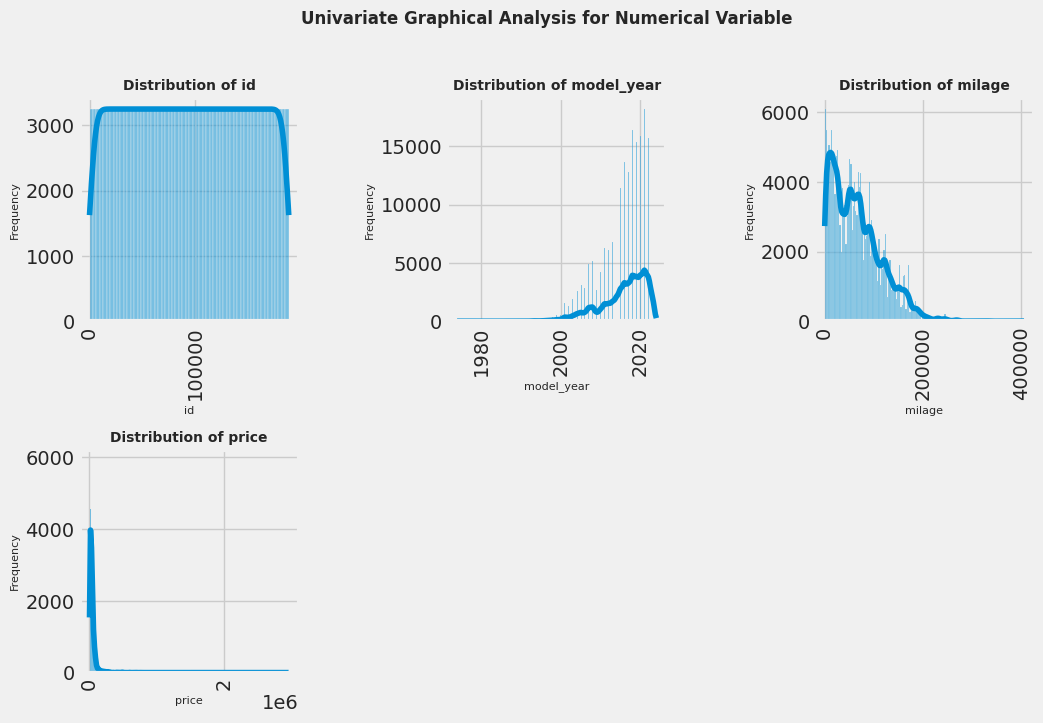

In [ ]:
num_column = train_num_cols.columns
n_cols = 3
n_rows = (len(num_column) + n_cols- 1) // n_cols # Calculate the num of rows

fig, axes = plt.subplots(n_rows, n_cols,figsize = (12, n_rows * 4)) # Adjusted figure size
axes = axes.flatten()
fig.tight_layout(pad = 5)
plt.suptitle("Univariate Graphical Analysis for Numerical Variable", fontsize = 12, fontweight = "bold")

for i, col in enumerate(num_column):
  sns.histplot(train_num_cols[col], kde= True, ax = axes[i])
  axes[i].set_title(f"Distribution of {col}", fontsize = 10, fontweight = "bold")
  axes[i].set_xlabel(col, fontsize =8)
  axes[i].set_ylabel("Frequency", fontsize = 8)
  axes[i].tick_params(axis ="x", rotation = 90)

# Remove unused spaces
for j in range (i + 1, len(axes)): # Start from i + 1 to remove remaining axes
  fig.delaxes(axes[j])

plt.show()

**Checking outliers**


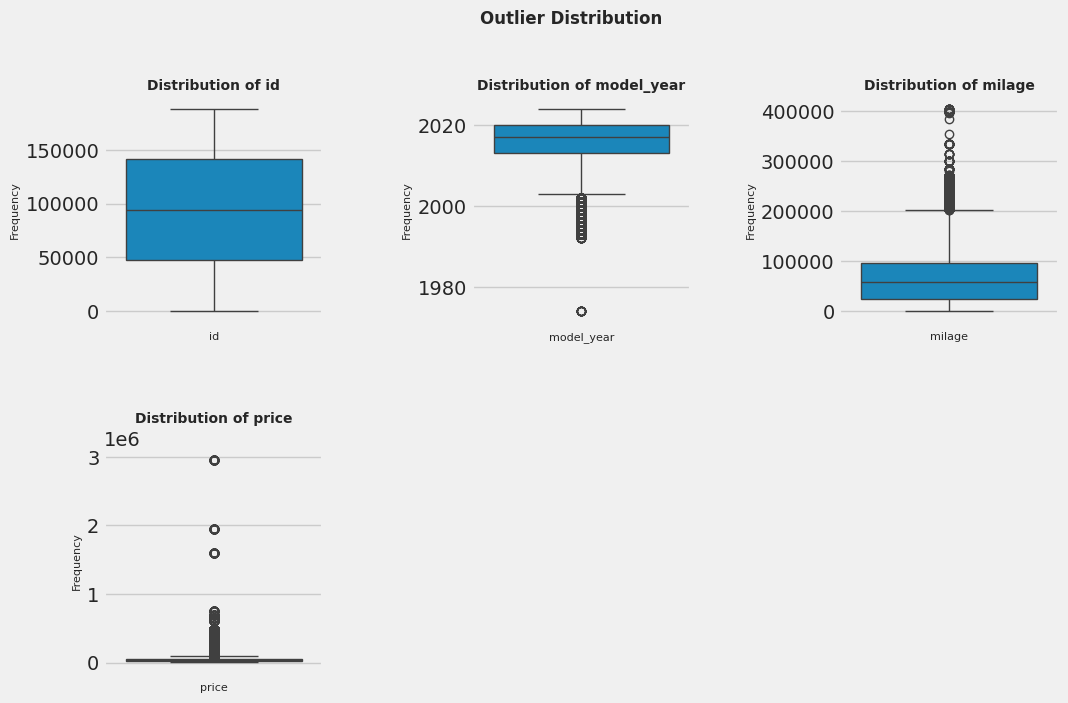

In [ ]:
#PLot to check outlier using boxplot
num_column = train_num_cols.columns
n_cols = 3
n_rows = (len(num_column) + n_cols- 1) // n_cols # Calculate the num of rows

fig, axes = plt.subplots(n_rows, n_cols,figsize = (12, n_rows * 4)) # Adjusted
axes = axes.flatten()
fig.tight_layout(pad = 5)
plt.suptitle("Outlier Distribution", fontsize = 12, fontweight = "bold")

for i, col in enumerate(num_column):
  sns.boxplot(train_num_cols[col], ax = axes[i])
  axes[i].set_title(f"Distribution of {col}", fontsize = 10, fontweight = "bold")
  axes[i].set_xlabel(col, fontsize =8)
  axes[i].set_ylabel("Frequency", fontsize = 8)
  axes[i].tick_params(axis ="x", rotation = 90)

#Remove unused space
for j in range (i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.show()

**Univariate Graphical Analysis for Categorical variable**

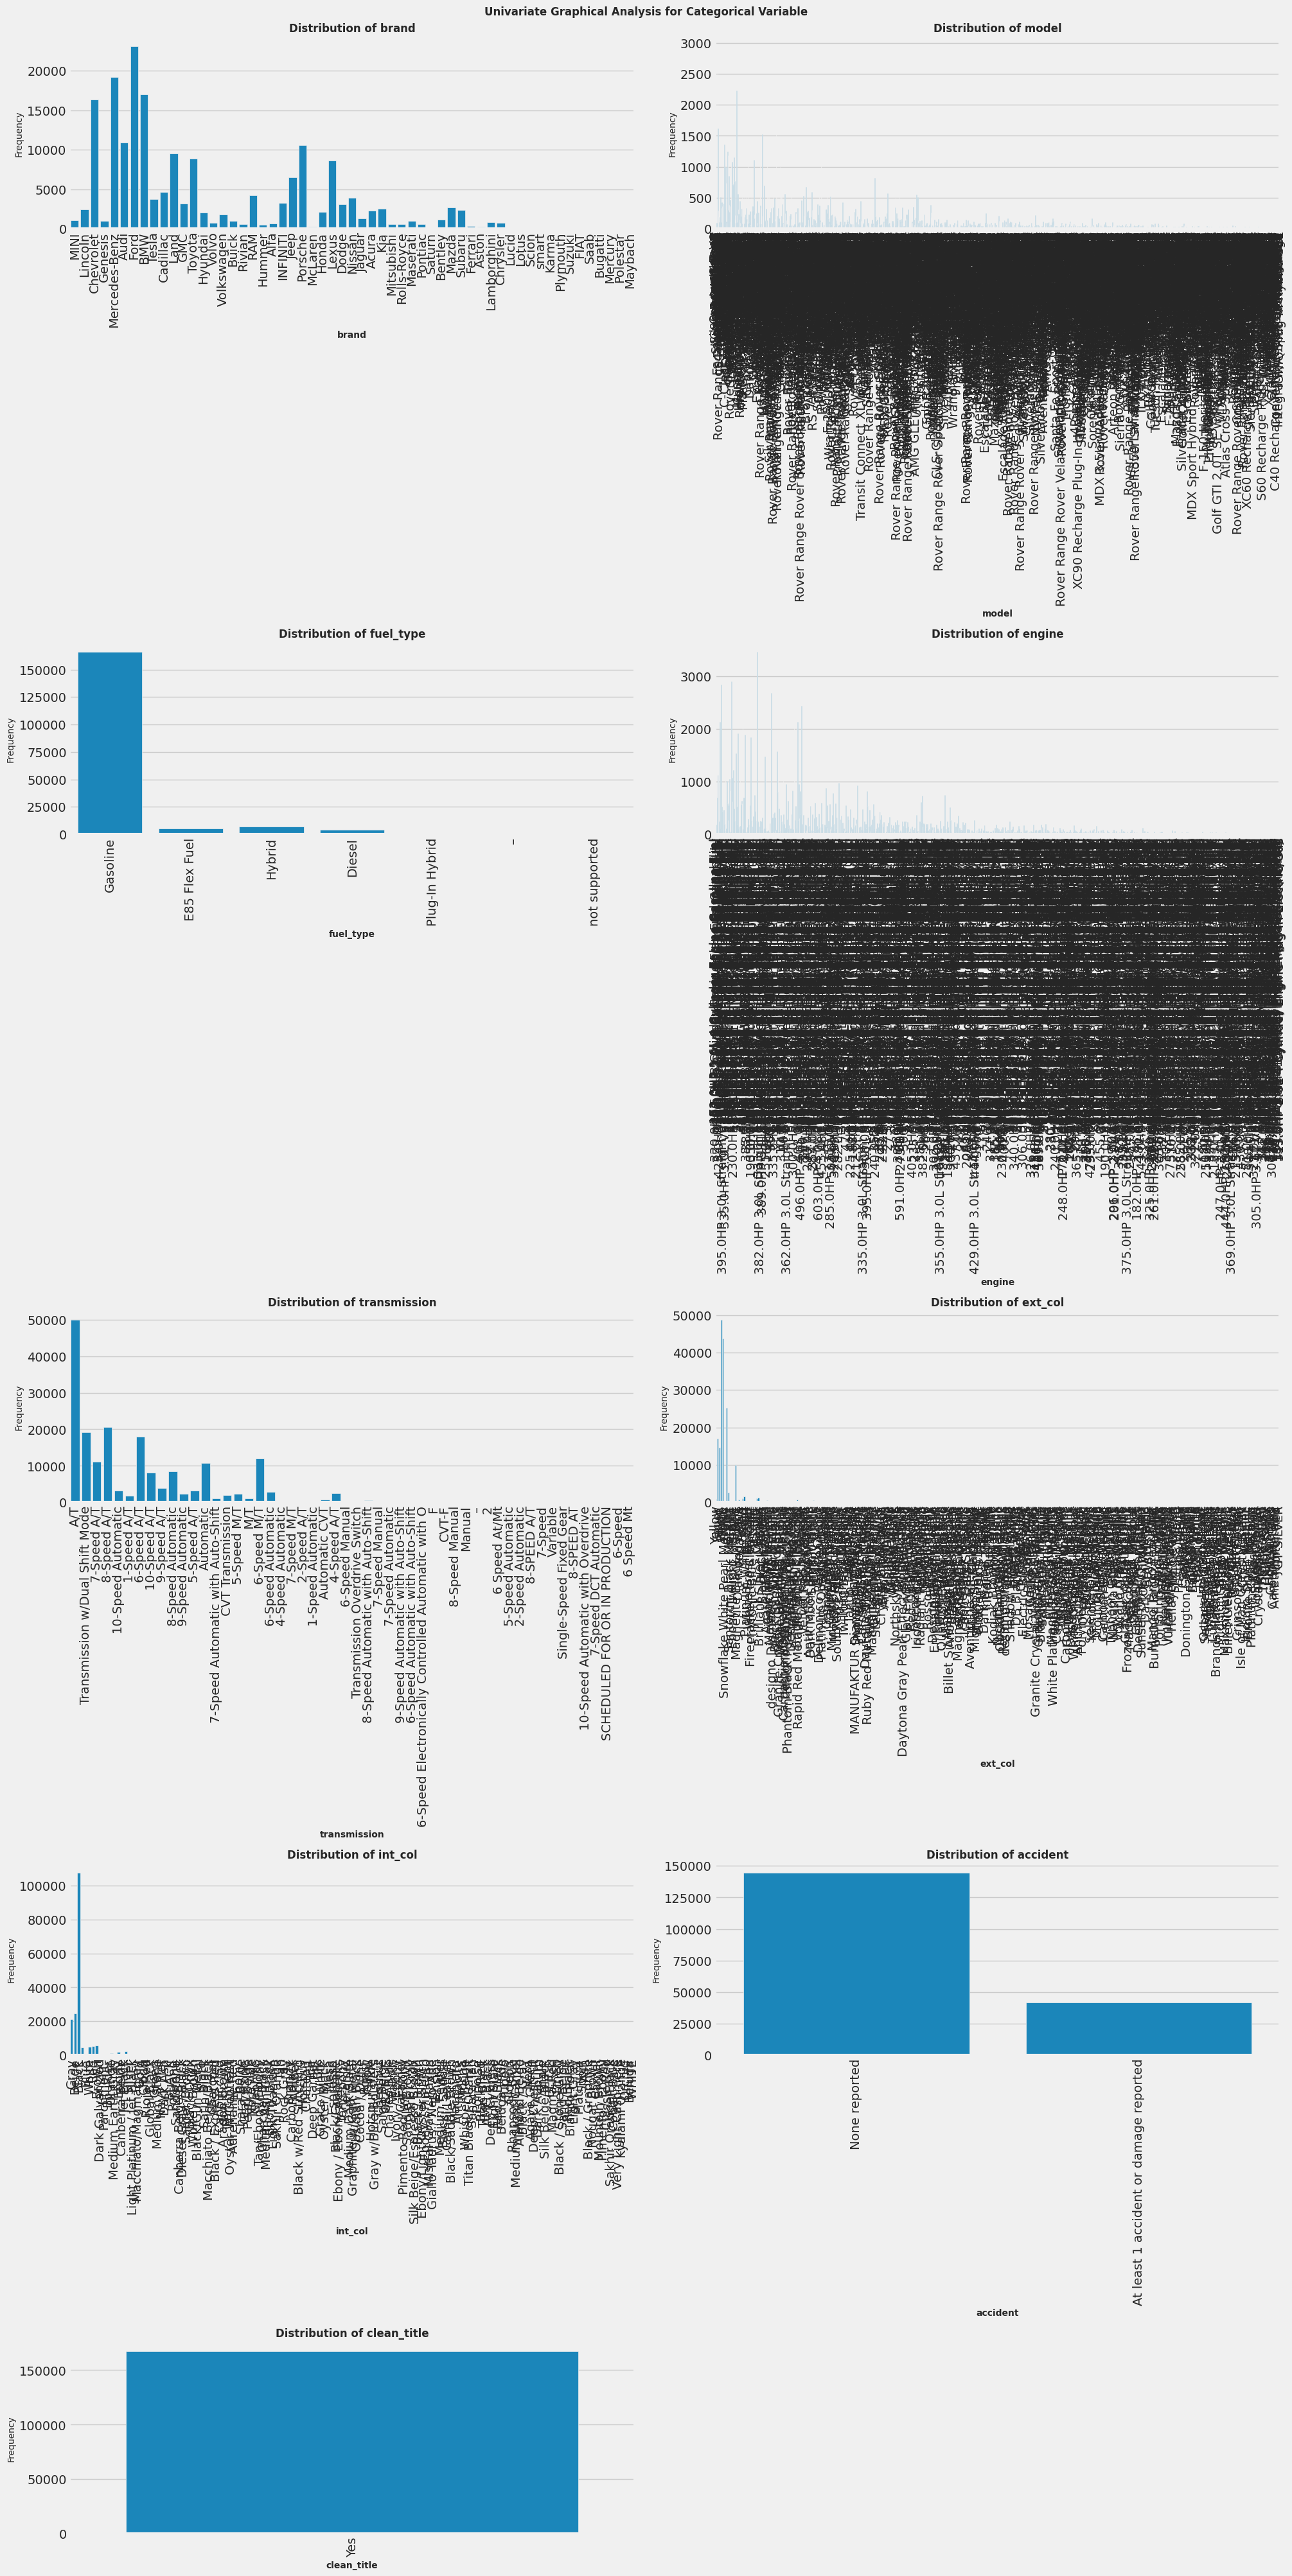

In [ ]:
# Visualize using barplot
cat_column = train_cat_cols.columns
n_cols = 2
n_rows = (len(cat_column) + n_cols -1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize = (20, n_rows * 8), constrained_layout = True)
axes = axes.flatten()
plt.suptitle("Univariate Graphical Analysis for Categorical Variable", fontsize = 12, fontweight = "bold")

for i, col in enumerate(cat_column):
  sns.countplot(data= train_cat_cols, x= col, ax = axes[i])
  axes[i].set_title(f"Distribution of {col}", fontsize = 12, fontweight = "bold")
  axes[i].set_xlabel(col, fontsize = 10, fontweight = "bold")
  axes[i].set_ylabel("Frequency", fontsize = 10)
  axes[i].tick_params(axis = "x", rotation = 90)

#Remove unused space
for j in range (i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.show()


###**Bivariate Graphical Analysis**

**Bivariate Analysis of Numerical Variable**

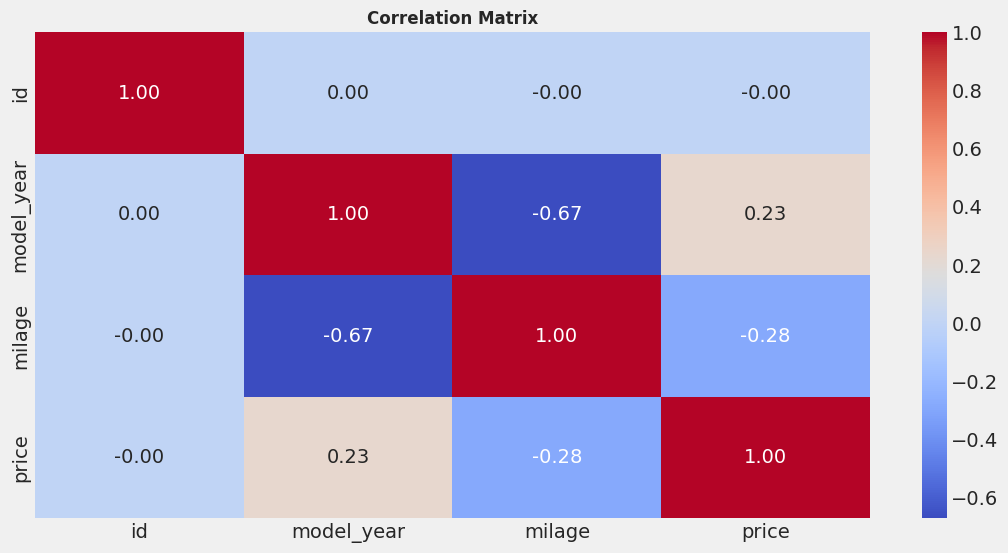

In [ ]:
#Correlation matrix relationship

corr_matrix = train_num_cols.corr()
corr_matrix

#Plot a graph
plt.figure(figsize= (12, 6))
sns.heatmap(corr_matrix, annot = True, cmap ="coolwarm", fmt= ".2f")
plt.title("Correlation Matrix", fontsize = 12, fontweight = "bold")
plt.show()


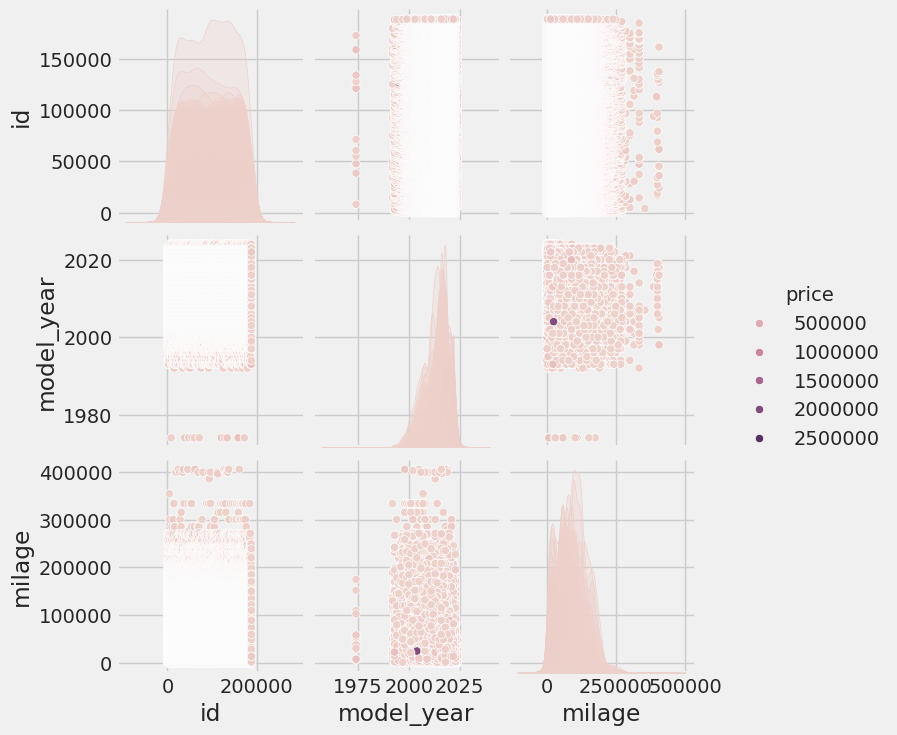

In [ ]:
#using pairplot
sns.pairplot(data= train_df, hue= "price")
plt.show()

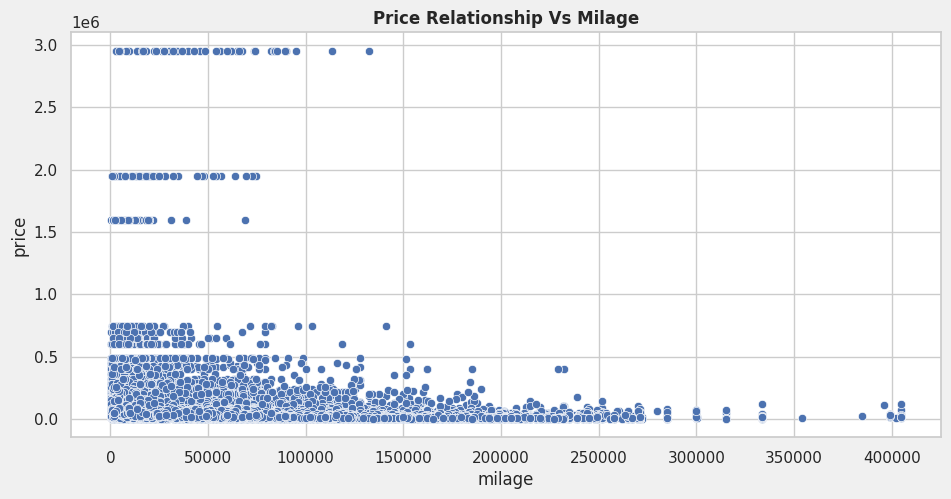

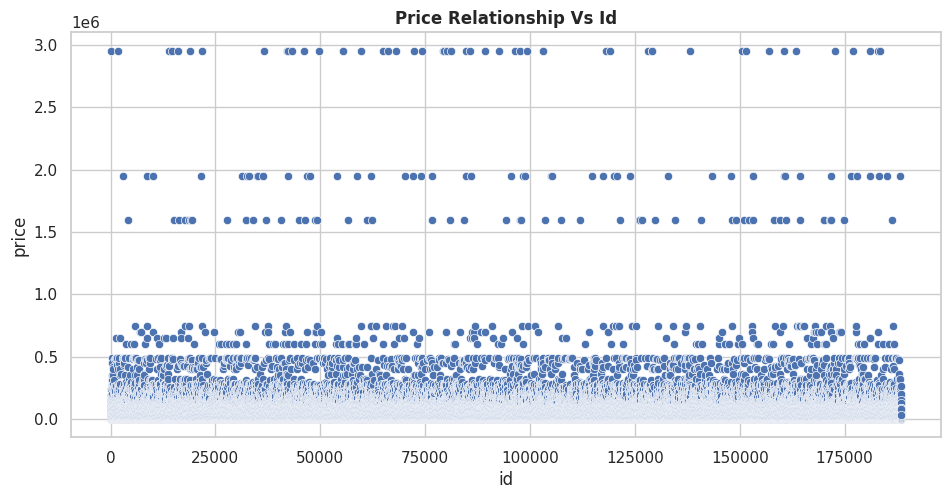

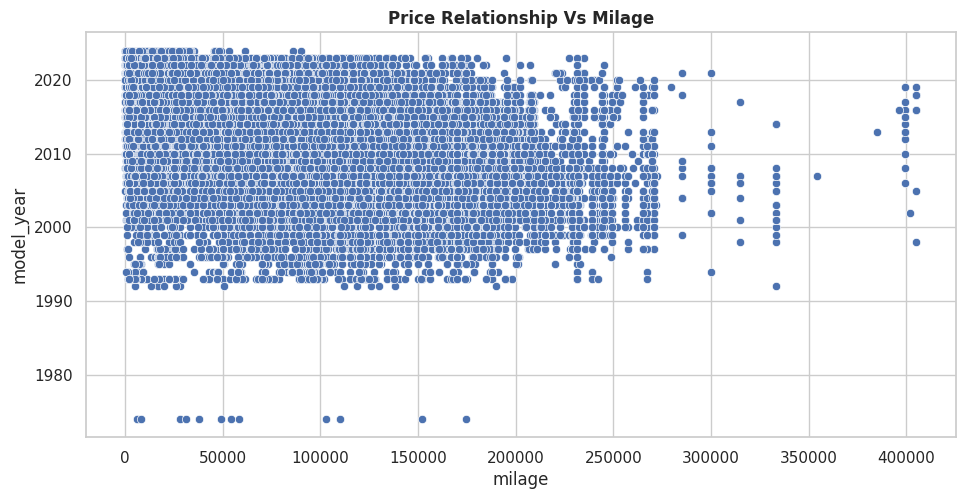

In [ ]:
#Using scatterplot

#Milage Vs Price
plt.figure(figsize=(10, 5))
sns.set(style ="whitegrid")
sns.scatterplot(data= train_df, x= "milage", y = "price" )
plt.title("Price Relationship Vs Milage", fontsize = 12, fontweight = "bold")
plt.show()


# Id Vs Price
plt.figure(figsize=(10, 5))
sns.set(style= "whitegrid")
sns.scatterplot(data= train_df, x = "id", y = "price")
plt.title("Price Relationship Vs Id", fontsize = 12, fontweight = "bold")
plt.show()

#Milage Vs MOdel year
plt.figure(figsize=(10, 5))
sns.set(style= "whitegrid")
sns.scatterplot(data= train_df, x= "milage", y = "model_year")
plt.title("Price Relationship Vs Milage", fontsize = 12, fontweight = "bold")
plt.show()



**Bivariate Analysis of Categorical Variable**

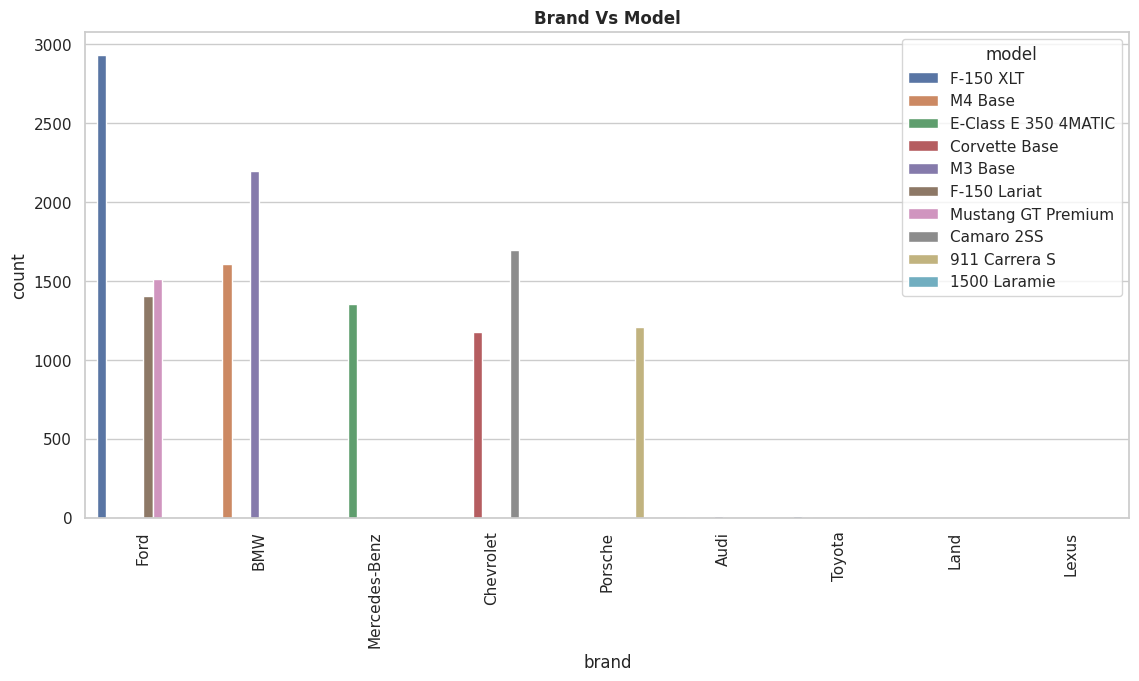

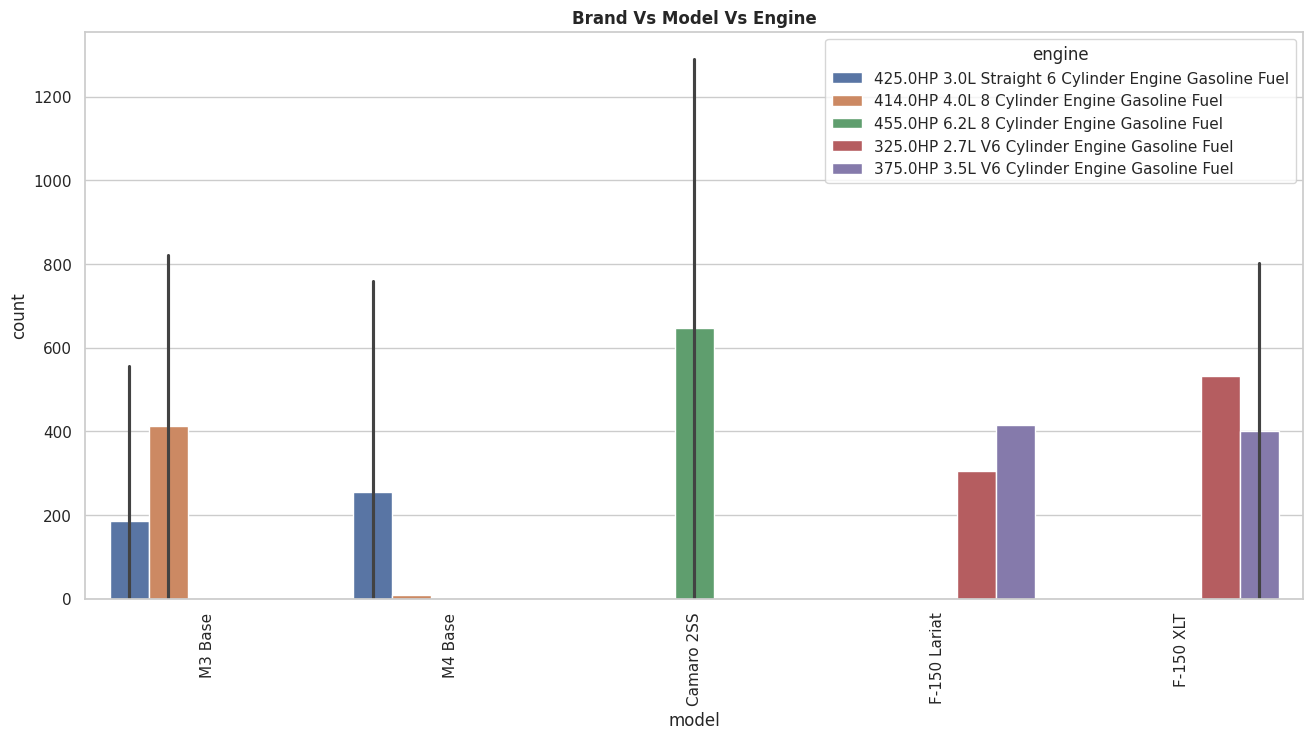

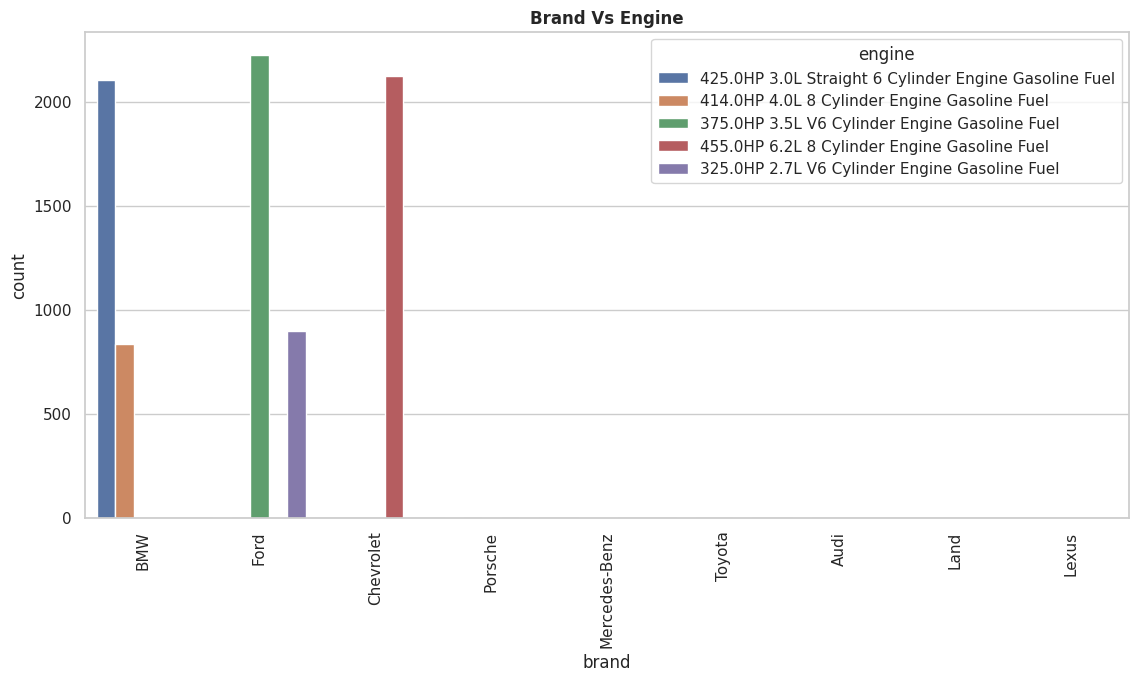

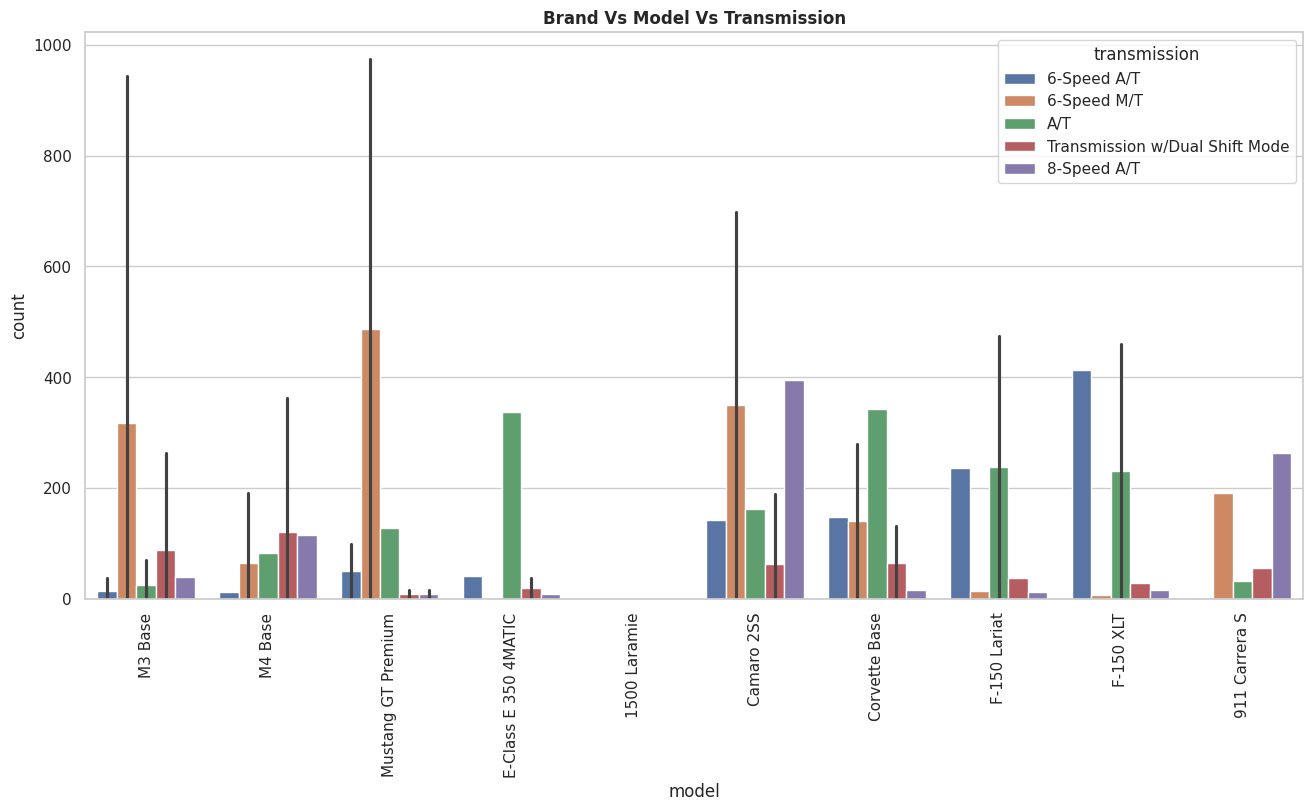

In [ ]:
#Brand Vs Model
plt.figure(figsize=(12, 6))
sns.set(style= "whitegrid")

#extract the top 10 model and brand
top_10_model = train_df["model"].value_counts().nlargest(10).index
top_10_brand = train_df["brand"].value_counts().nlargest(10).index
#Filter the dataframe to contain 10 model and brand
train_df_top_10 = train_df[train_df["model"].isin(top_10_model) & train_df["brand"].isin(top_10_brand)]

#Plot a graph
sns.countplot(data= train_df_top_10, x= "brand", hue= "model")
plt.title("Brand Vs Model", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()


#Brand Vs Model Vs Engine
plt.figure(figsize=(14, 7))
sns.set(style= "whitegrid")

# Filter the dataframe to contain top brands and models first
train_df_filtered_bm = train_df[
    train_df["brand"].isin(top_10_brand) &
    train_df["model"].isin(top_10_model)
].copy()

# Filter the top 5 engine within the filtered data
top_5_engine = train_df_filtered_bm["engine"].value_counts().nlargest(5).index

# Further filter to include top 5 engines
train_df_filtered_bme = train_df_filtered_bm[train_df_filtered_bm["engine"].isin(top_5_engine)].copy()


#Group by brand, model and engine
brand_model_engine = train_df_filtered_bme.groupby(["brand", "model", "engine"]).size().reset_index(name= "count")

#Plot a graph
sns.barplot(data= brand_model_engine, x= "model", y = "count", hue= "engine")
plt.title("Brand Vs Model Vs Engine", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()


#Brand Vs Engine
plt.figure(figsize=(12, 6))
sns.set(style= "whitegrid")

# Filter to contain top brands and top 5 engines
train_df_brandengine = train_df[
    train_df["brand"].isin(top_10_brand) &
    train_df["engine"].isin(top_5_engine)
].copy()

#Plot a graph
sns.countplot(data= train_df_brandengine, x= "brand", hue= "engine")
plt.title("Brand Vs Engine", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()


#Brand Vs Model Vs Transmission
plt.figure(figsize=(14, 7))
sns.set(style= "whitegrid")
#Filter the top 5 transmission
top_5_transmission = train_df["transmission"].value_counts().nlargest(5).index

# Filter the dataframe to contain top brands,top model and transmission
train_df_bmt = train_df[
    train_df["brand"].isin(top_10_brand) &
    train_df["model"].isin(top_10_model) &
    train_df["transmission"].isin(top_5_transmission)
].copy()


#Group by brand, model and transmission
brand_model_transmission = train_df_bmt.groupby(["brand", "model", "transmission"]).size().reset_index(name= "count")

#Plot a graph
sns.barplot(data= brand_model_transmission, x= "model", y = "count", hue= "transmission")
plt.title("Brand Vs Model Vs Transmission", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()

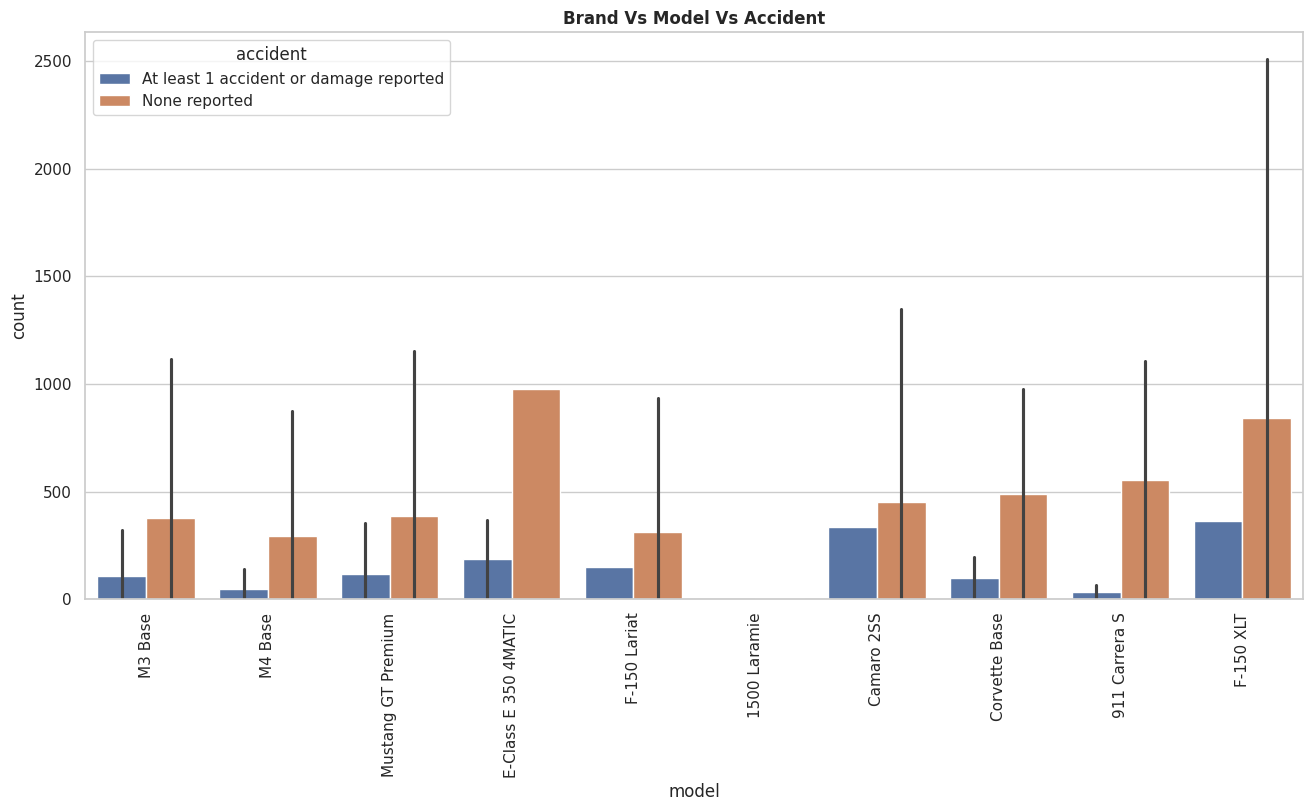

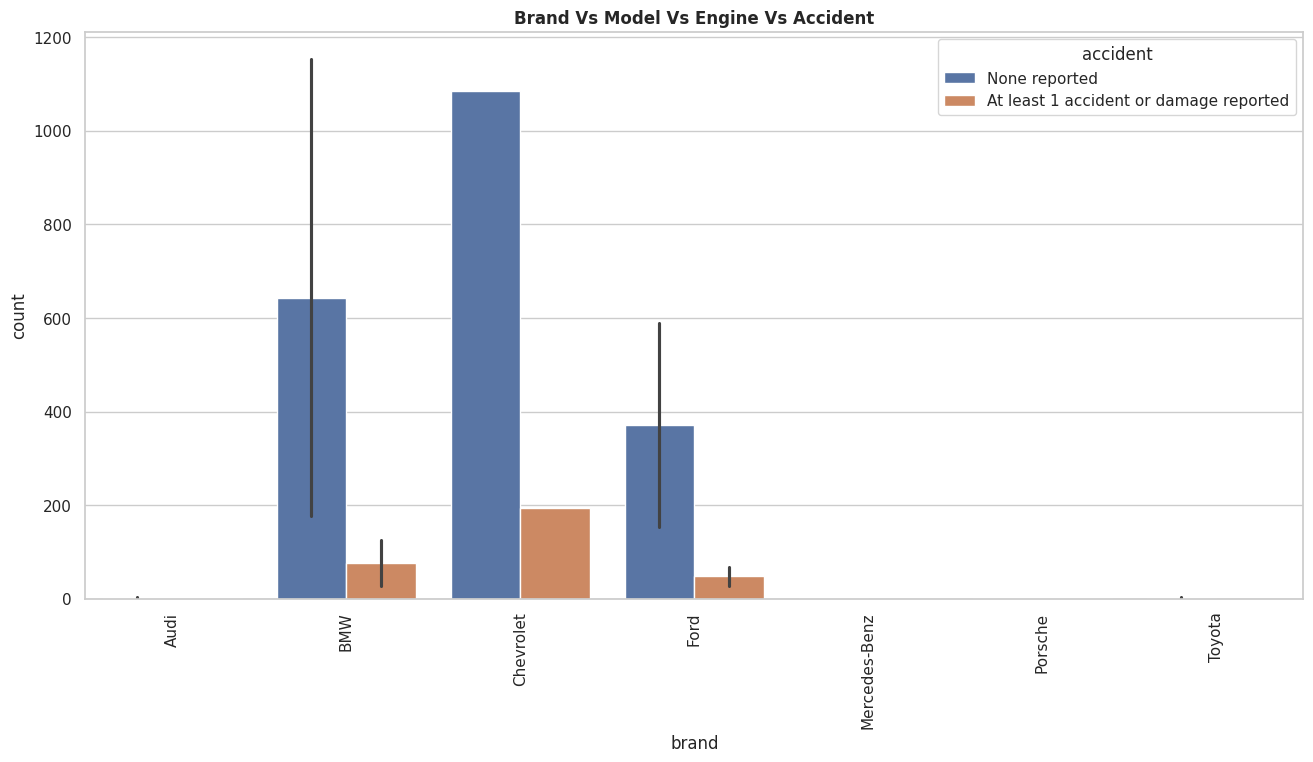

In [ ]:
#Brand Vs Model Vs Accident
plt.figure(figsize=(14, 7))
sns.set(style= "whitegrid")


#Group by brand, model and accident and reset index to get a DataFrame
brand_model_accident = train_df_top_10.groupby(["brand", "model", "accident"]).size().reset_index(name= "count")

#Plot a graph
sns.barplot(data= brand_model_accident, x= "model", y="count", hue= "accident")
plt.title("Brand Vs Model Vs Accident", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()


#Brand Vs Model Vs Engine Vs Accident
plt.figure(figsize=(14, 7))
sns.set(style= "whitegrid")

#Group by brand, model, engine ad accident
brand_model_engine_accident = train_df_filtered_bme.groupby(["brand", "model", "engine", "accident"]).size().reset_index(name= "count")
#Plot a graph
sns.barplot(data= brand_model_engine_accident, x= "brand", y= "count", hue= "accident")
plt.title("Brand Vs Model Vs Engine Vs Accident", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()

**Bivariate Analysis of Numerical and Categorical Variable**

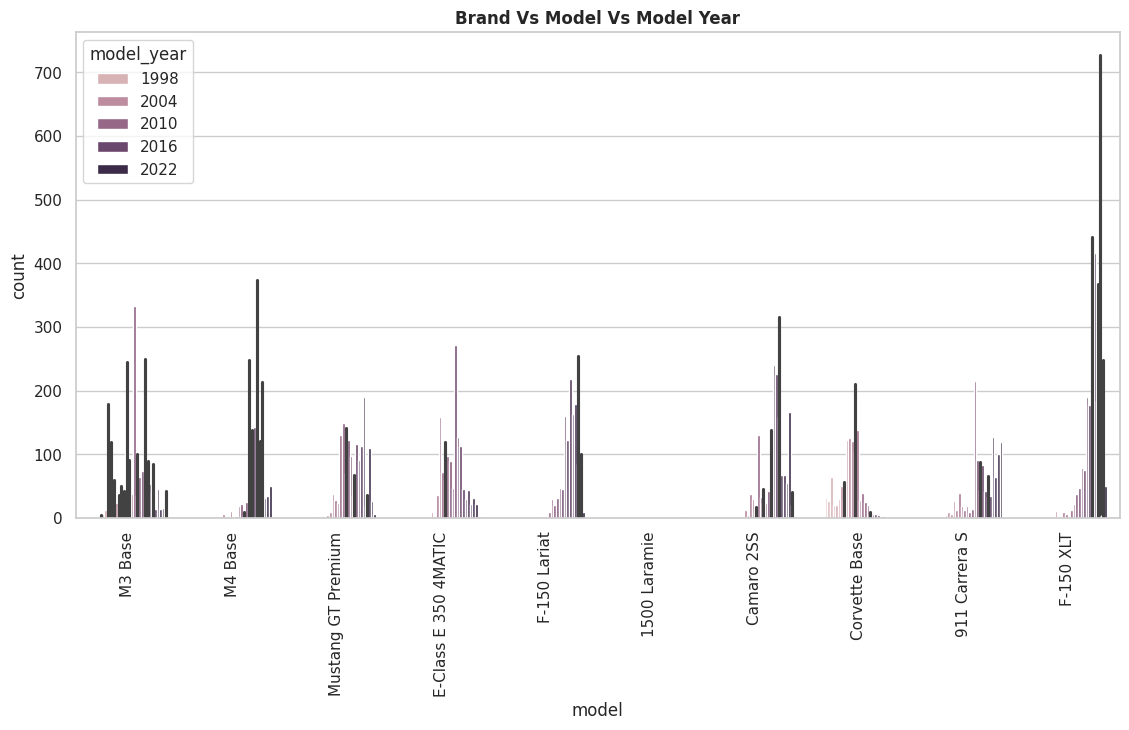

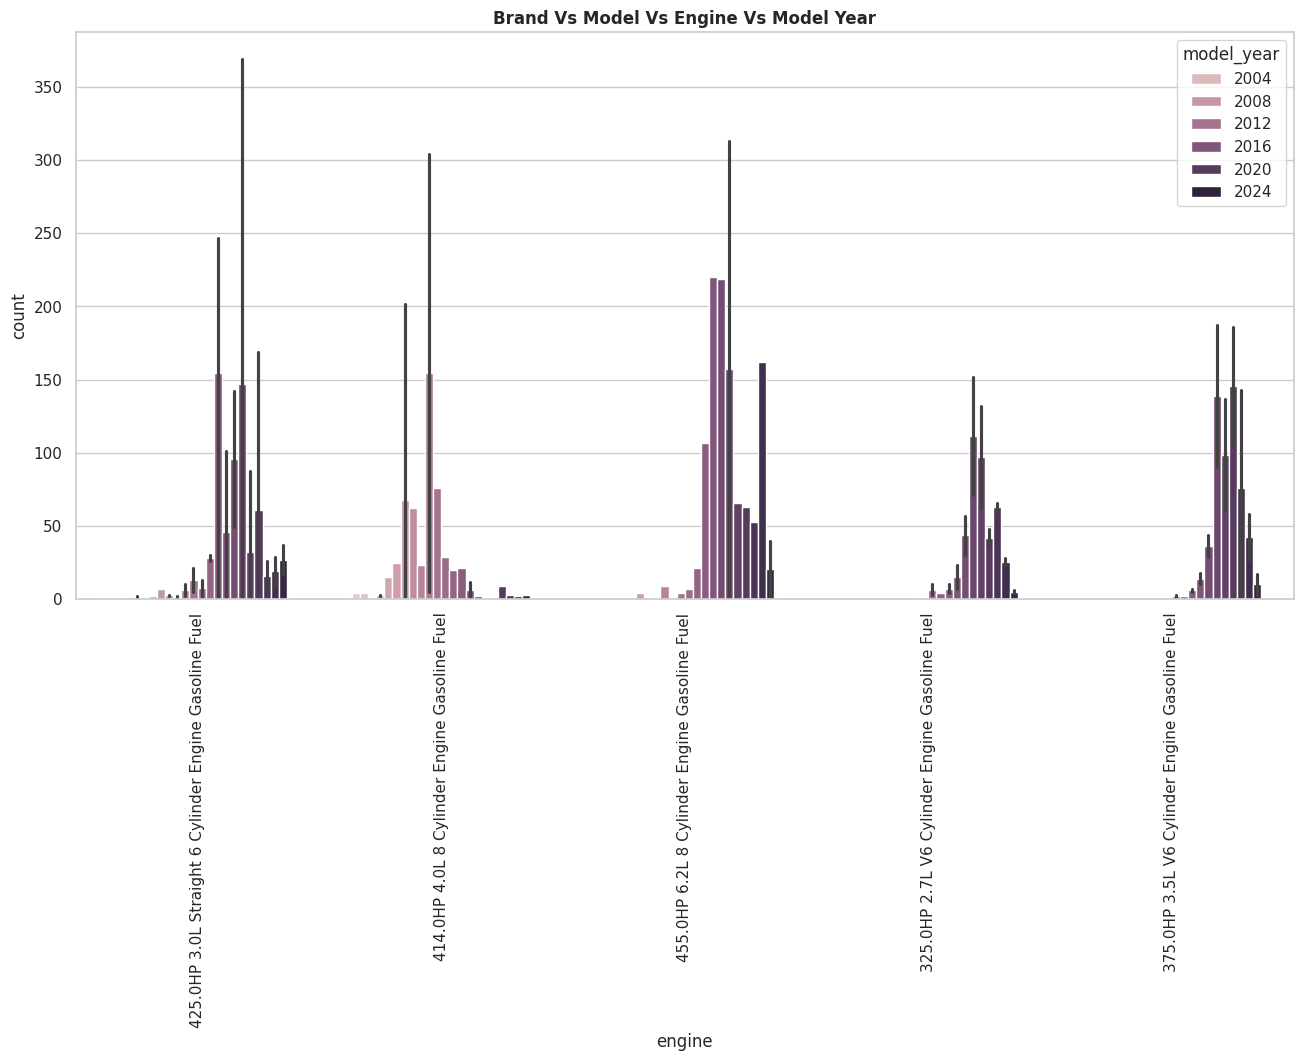

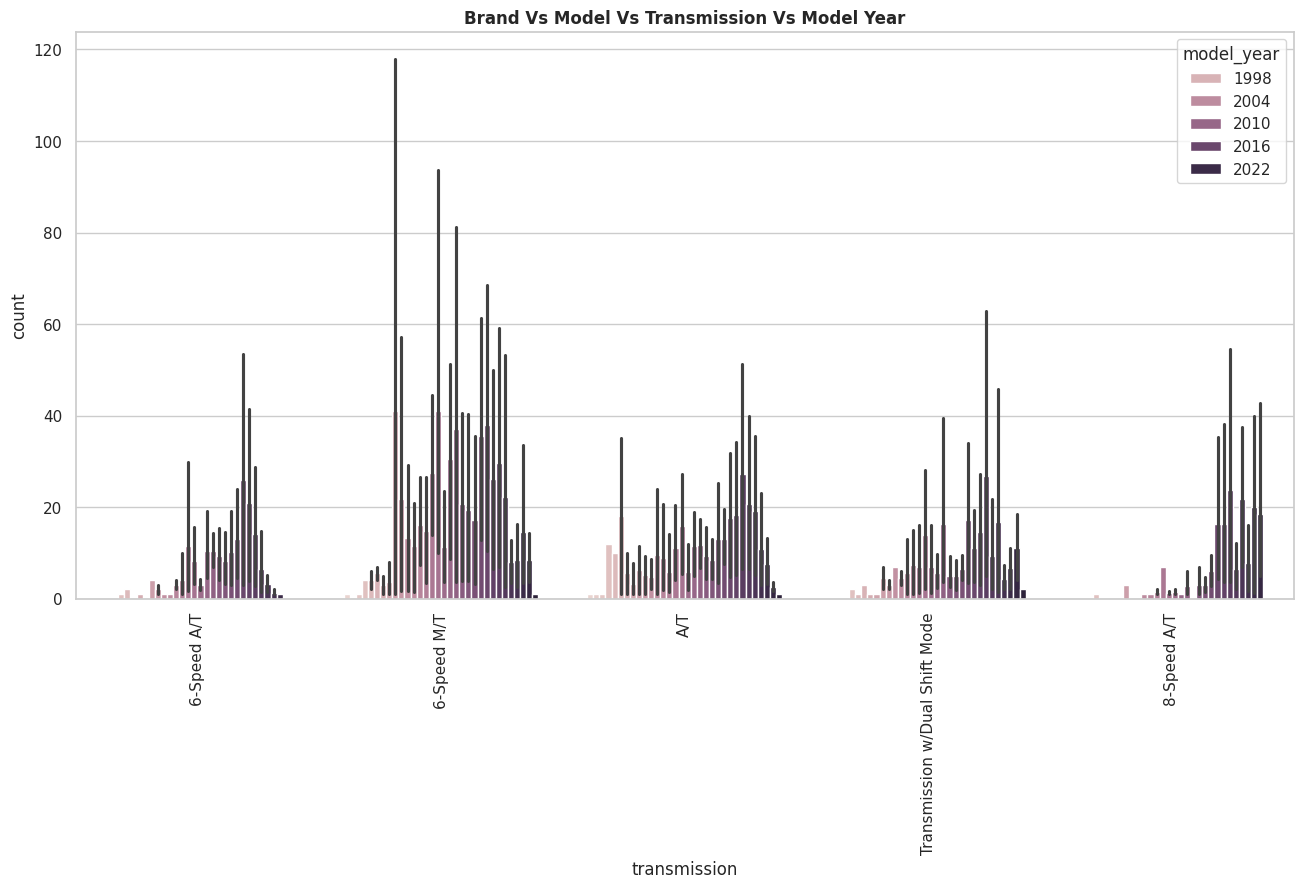

In [ ]:
#Brand Vs Model Vs Model year
plt.figure(figsize=(12, 6))
sns.set(style= "whitegrid")
#Group by model year
brand_model_year = train_df_top_10.groupby(["brand", "model", "model_year"]).size().reset_index(name= "count")
#Plot a graph
sns.barplot(data= brand_model_year, x= "model", y= "count", hue= "model_year")
plt.title("Brand Vs Model Vs Model Year", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()


#Brand Vs Model Vs Engine Vs Model Year
plt.figure(figsize=(14, 7))
sns.set(style= "whitegrid")
#Group by model year
brand_model_engine_year = train_df_filtered_bme.groupby(["brand", "model", "engine", "model_year"]).size().reset_index(name= "count")
#Plot a graph
sns.barplot(data= brand_model_engine_year, x= "engine", y= "count", hue= "model_year")
plt.title("Brand Vs Model Vs Engine Vs Model Year", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()


#Brand Vs MOdel Vs Transmission Vs Model Year
plt.figure(figsize=(14, 7))
sns.set(style= "whitegrid")
#Group by model year
brand_model_transmission_year = train_df_bmt.groupby(["brand", "model", "transmission", "model_year"]).size().reset_index(name= "count")
#Plot a graph
sns.barplot(data= brand_model_transmission_year, x= "transmission", y= "count", hue= "model_year")
plt.title("Brand Vs Model Vs Transmission Vs Model Year", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()


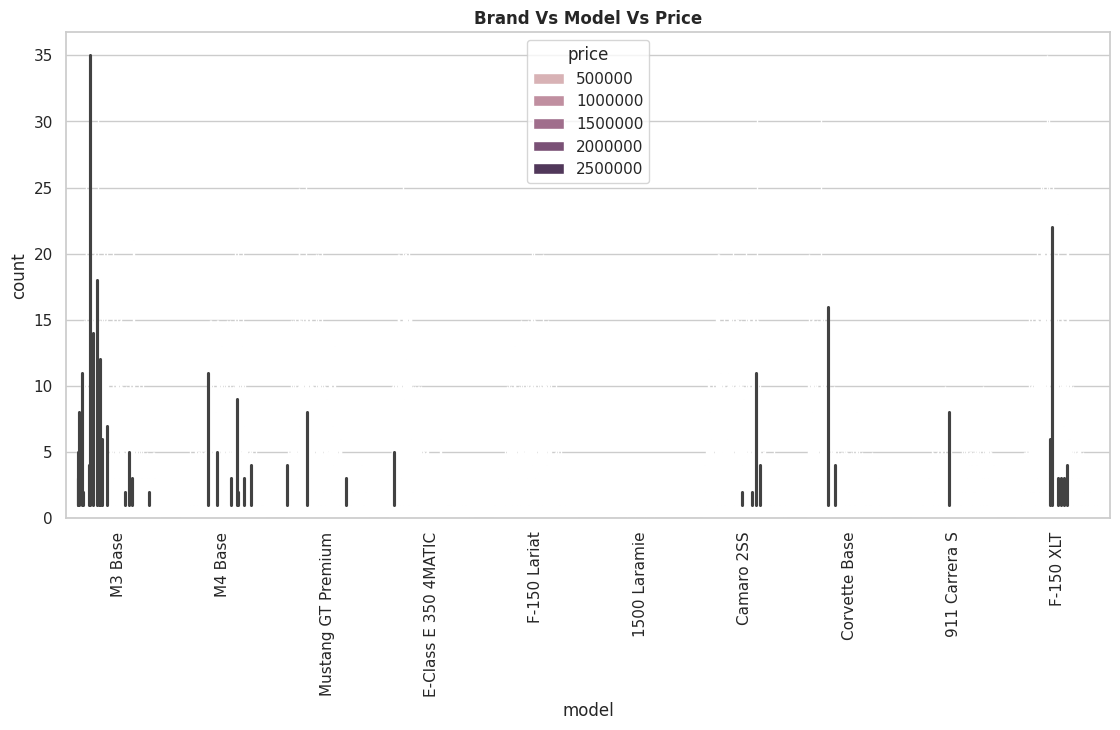

In [ ]:
#Brand Vs MOdel Vs Price
plt.figure(figsize=(12, 6))
sns.set(style= "whitegrid")
#Group by price
brand_model_price = train_df_top_10.groupby(["brand", "model", "price"]).size().reset_index(name= "count")
#Plot a graph
sns.barplot(data= brand_model_price, x= "model", y= "count", hue= "price")
plt.title("Brand Vs Model Vs Price", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()

##**STEP 4: Data Pre-processing, Feature Engineering and Selection**

###**Data Cleaning and Pre-processing**

In [ ]:
#View dataset info
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ---

(None, None)

In [ ]:
#Check for missing values

#For train dataset
train_df.isnull().sum().sort_values(ascending= False) * 100 /len(train_df)


clean_title     11.360876
fuel_type        2.696080
accident         1.300568
brand            0.000000
id               0.000000
milage           0.000000
model_year       0.000000
model            0.000000
engine           0.000000
ext_col          0.000000
transmission     0.000000
int_col          0.000000
price            0.000000
dtype: float64

In [ ]:
#For test dataset
test_df.isnull().sum().sort_values(ascending= False) * 100 /len(test_df)

clean_title     11.328666
fuel_type        2.691543
accident         1.298433
id               0.000000
model_year       0.000000
model            0.000000
brand            0.000000
milage           0.000000
transmission     0.000000
engine           0.000000
int_col          0.000000
ext_col          0.000000
dtype: float64

**For train dataset**

In [ ]:
#Correct with the most frequent for column clean_title, fuel_type and accident

train_df["clean_title"].fillna(train_df["clean_title"].mode()[0], inplace= True)
train_df["fuel_type"].fillna(train_df["fuel_type"].mode()[0], inplace= True)
train_df["accident"].fillna(train_df["accident"].mode()[0], inplace= True)



**For test  dataset**

In [ ]:
#Handle the missing values with most frequent
test_df["clean_title"].fillna(test_df["clean_title"].mode()[0], inplace = True)
test_df["fuel_type"].fillna(test_df["fuel_type"].mode()[0], inplace = True)
test_df["accident"].fillna(test_df["accident"].mode()[0], inplace = True)


In [ ]:
#Reconfirm
train_df.isna().sum(), test_df.isna().sum()


(id              0
 brand           0
 model           0
 model_year      0
 milage          0
 fuel_type       0
 engine          0
 transmission    0
 ext_col         0
 int_col         0
 accident        0
 clean_title     0
 price           0
 dtype: int64,
 id              0
 brand           0
 model           0
 model_year      0
 milage          0
 fuel_type       0
 engine          0
 transmission    0
 ext_col         0
 int_col         0
 accident        0
 clean_title     0
 dtype: int64)

In [ ]:
#View the dataset
train_df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

In [ ]:
#For Train dataset

# Replace '-' with 'unknown' in categorical columns for train_df
for col in train_df.select_dtypes(include='object').columns:
    train_df[col] = train_df[col].replace('–', 'unknown')

In [ ]:
#For test dataset

#Replace "-" with unknown
for col in test_df.select_dtypes(include= "object").columns:
  test_df[col] = test_df[col].replace("–", "unknown")

###**Feature Engineering and Creation**

In [ ]:
#View the dataset
train_df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

####**Mapping and Encoding of Categorical Variable**





In [ ]:
#Since accident and clean title has one to binary values it will be mapped.

#First check the unique of accident and clean title
train_df["accident"].unique(), train_df["clean_title"].unique()

(array(['None reported', 'At least 1 accident or damage reported'],
       dtype=object),
 array(['Yes'], dtype=object))

In [ ]:
#For Train dataset mapping
train_df["accident"] = train_df["accident"].map({"At least 1 accident or damage reported": 1, "None reported": 0})
train_df["clean_title"] = train_df["clean_title"].map({"Yes": 1})

In [ ]:
#For test dataset mapping
test_df["accident"] = test_df["accident"].map({"At least 1 accident or damage reported": 1, "None reported": 0})
test_df["clean_title"] = test_df["clean_title"].map({"Yes": 1})

In [ ]:
train_df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  accident  clean_title  \
0                             A/T  Yellow    Gray         0            1   
1                             A/T  Silver   Beige         1            1   
2                             A/T    Blue    Gray         0            1   
3  Transmission w/Dual Shift Mode   Black   Black         0            1   
4                     7-Speed A/T   Black   Beige         0            1   

   price  
0   4200  
1   4999  
2  13900  
3  45000  
4  97500

####**Creation of new features**

**Car Age**

In [ ]:
#Since the model year is in int, the number will be subtracted from 2025(current year)

#For train dataset
train_df["car_age"] = 2025 - train_df["model_year"]

#For test dataset
test_df["car_age"] = 2025 - test_df["model_year"]

**Average distances covered by the car age**





In [ ]:
#Average distances covered by the car age
train_df["total_distance"] = train_df["car_age"] / train_df["milage"]
test_df["total_distance"] = test_df["car_age"] / test_df["milage"]

In [ ]:
train_df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  accident  clean_title  \
0                             A/T  Yellow    Gray         0            1   
1                             A/T  Silver   Beige         1            1   
2                             A/T    Blue    Gray         0            1   
3  Transmission w/Dual Shift Mode   Black   Black         0            1   
4                     7-Speed A/T   Black   Beige         0            1   

   price  car_age  total_distance  
0   4200       18        0.000085  
1   4999       23        0.000161  
2  13900       23        0.000168  
3  45000        8        0.000410  
4  97500        4        0.000541

In [ ]:
#View the final views
train_df.head(), test_df.head()

(   id          brand              model  model_year  milage      fuel_type  \
 0   0           MINI      Cooper S Base        2007  213000       Gasoline   
 1   1        Lincoln              LS V8        2002  143250       Gasoline   
 2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
 3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
 4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   
 
                                               engine  \
 0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
 1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
 2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
 3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
 4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
 
                      transmission ext_col int_col  accident  clean_title  \
 0                             A/T  Yellow    Gray         0            1   
 1                        

In [ ]:
#view the number and object
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              188533 non-null  int64  
 1   brand           188533 non-null  object 
 2   model           188533 non-null  object 
 3   model_year      188533 non-null  int64  
 4   milage          188533 non-null  int64  
 5   fuel_type       188533 non-null  object 
 6   engine          188533 non-null  object 
 7   transmission    188533 non-null  object 
 8   ext_col         188533 non-null  object 
 9   int_col         188533 non-null  object 
 10  accident        188533 non-null  int64  
 11  clean_title     188533 non-null  int64  
 12  price           188533 non-null  int64  
 13  car_age         188533 non-null  int64  
 14  total_distance  188533 non-null  float64
dtypes: float64(1), int64(7), object(7)
memory usage: 21.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeI

(None, None)

**Checking missing value and duplicates**

In [ ]:
#Missing values
train_df.isna().sum(), test_df.isna().sum()

(id                0
 brand             0
 model             0
 model_year        0
 milage            0
 fuel_type         0
 engine            0
 transmission      0
 ext_col           0
 int_col           0
 accident          0
 clean_title       0
 price             0
 car_age           0
 total_distance    0
 dtype: int64,
 id                0
 brand             0
 model             0
 model_year        0
 milage            0
 fuel_type         0
 engine            0
 transmission      0
 ext_col           0
 int_col           0
 accident          0
 clean_title       0
 car_age           0
 total_distance    0
 dtype: int64)

In [ ]:
#Check for duplicates
train_df.duplicated().sum(), test_df.duplicated().sum()

(np.int64(0), np.int64(0))

In [ ]:
#Drop duplicates
train_df.drop_duplicates(inplace= True)
test_df.drop_duplicates(inplace= True)

In [ ]:
#recheck duplicates
train_df.duplicated().sum(), test_df.duplicated().sum()

(np.int64(0), np.int64(0))

In [ ]:
#recheck missing values
train_df.isna().sum(), test_df.isna().sum()

(id                0
 brand             0
 model             0
 model_year        0
 milage            0
 fuel_type         0
 engine            0
 transmission      0
 ext_col           0
 int_col           0
 accident          0
 clean_title       0
 price             0
 car_age           0
 total_distance    0
 dtype: int64,
 id                0
 brand             0
 model             0
 model_year        0
 milage            0
 fuel_type         0
 engine            0
 transmission      0
 ext_col           0
 int_col           0
 accident          0
 clean_title       0
 car_age           0
 total_distance    0
 dtype: int64)

**Dropping of Irrelevant Column**

In [ ]:
#The following column will be dropped: id and model_year, id will be removed only in train not test as this is needed in submission
#The car_age contain the same infomation as model_ year

#For train dataset
col_to_drop = ["id", "model_year"]
train_df.drop(columns= col_to_drop, inplace= True)

In [ ]:
#For test dataset, id will be saved before removal
test_id = test_df["id"]
test_df.drop(columns= col_to_drop, inplace= True)

In [ ]:
#Check the shape
train_df.shape, test_df.shape

((188533, 13), (125690, 12))

###**Pipelines for Feature Engineering, Preprocessing and Selection**

Based on the analysis, the train dataset will be separated into training and validation set.

Both the separated trained and test dataset will be separated into number and categorical to enable the pipeline processing.

Due to the high cardinality features will be used for encoding.

**Separate the train set into X and y and after into Training and Validation**


In [ ]:
#Separate train set into X and y
X = train_df.drop(columns= "price")
y = train_df["price"]

In [ ]:
#Split the dataset into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.1, random_state= 42)

#Print thee size
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (169679, 12)
X_val shape: (18854, 12)
y_train shape: (169679,)
y_val shape: (18854,)


In [ ]:
#Check the shape of test
test_df.shape

(125690, 12)

**Separate the train and test set into Numerical and Category for pipeline**

In [ ]:
#For Train dataset
num_cols = X.select_dtypes(include= np.number)
cat_cols = X.select_dtypes(exclude= np.number)


#For Test dataset
# The test_df should also have numerical and categorical columns identified for consistency in the pipeline
num_cols = test_df.select_dtypes(include= np.number)
cat_cols = test_df.select_dtypes(exclude= np.number)

In [ ]:
#Check the column of both train, val and test
num_cols.columns, cat_cols.columns


(Index(['milage', 'accident', 'clean_title', 'car_age', 'total_distance'], dtype='object'),
 Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
        'int_col'],
       dtype='object'))

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


**Using Pipeline**

In [ ]:
#Import the necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder # Corrected import
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer # Import SimpleImputer
from category_encoders.count import CountEncoder # Corrected import
from sklearn.linear_model import Lasso


num_pipeline= Pipeline([
    ("scaler", StandardScaler())
])

cat_pipeline_count = Pipeline([
    ("count_encoder", CountEncoder(handle_unknown='ignore'))
])
cat_pipeline_target = Pipeline([
    ("target_encoder", TargetEncoder(handle_unknown='ignore'))
])


preprocessor= ColumnTransformer([
    ("num", num_pipeline, ['milage', 'car_age', 'total_distance']), # Apply num_pipeline to relevant numerical columns
    ("passthrough", "passthrough", ['accident', 'clean_title']), # Pass through mapped numerical columns
    ("cat_count", cat_pipeline_count, cat_cols.columns), # Apply CountEncoder to categorical columns
    ("cat_target", cat_pipeline_target, cat_cols.columns) # Apply TargetEncoder to categorical columns

]).set_output(transform="pandas") # Add this to retain feature names


full_pipeline= Pipeline([
    ("preprocessor", preprocessor),
    ("imputer", SimpleImputer(strategy='mean')), # add to prevent NaNs
    ("variance_threshold", VarianceThreshold(threshold= 0.0)),
    #("selector", SelectKBest(f_classif, k= 15))
    #("pca", PCA(n_components= 0.95))

])


print("Updated Pipeline")
display(full_pipeline)

Updated Pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['milage', 'car_age',
                                                   'total_distance']),
                                                 ('passthrough', 'passthrough',
                                                  ['accident', 'clean_title']),
                                                 ('cat_count',
                                                  Pipeline(steps=[('count_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                handle_unknown='ignore'))]),
                                                  Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col'],
      dtype='object')),
                                                 ('cat_target',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col'],
      dtype='object'))])),
                ('imputer', SimpleImputer()),
                ('variance_threshold', VarianceThreshold())])

**For the Training Dataset**

In [ ]:
#Apply the pipeline to the training set
X_train_processed = full_pipeline.fit_transform(X_train, y_train)

**For the Validation Dataset**

In [ ]:
#Apply the pipeline to the validation set
X_val_processed = full_pipeline.transform(X_val)

**For the Test DataSet**

In [ ]:
#Apply the pipeline to the test set
test_df_final = full_pipeline.transform(test_df)

In [ ]:
#Checking the size
#Printing
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val_processed shape: {X_val_processed.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"test_df_final shape: {test_df_final.shape}")


X_train_processed shape: (169679, 18)
y_train shape: (169679,)
X_val_processed shape: (18854, 18)
y_val shape: (18854,)
test_df_final shape: (125690, 18)


In [ ]:
#Check the final columns
# Convert processed arrays back to DataFrames with appropriate column names
X_train_processed = pd.DataFrame(X_train_processed, columns=full_pipeline.get_feature_names_out())
X_val_processed = pd.DataFrame(X_val_processed, columns=full_pipeline.get_feature_names_out())
test_df_final = pd.DataFrame(test_df_final, columns=full_pipeline.get_feature_names_out())

X_train_processed.columns, X_val_processed.columns, test_df_final.columns

(Index(['num__milage', 'num__car_age', 'num__total_distance',
        'passthrough__accident', 'cat_count__brand', 'cat_count__model',
        'cat_count__fuel_type', 'cat_count__engine', 'cat_count__transmission',
        'cat_count__ext_col', 'cat_count__int_col', 'cat_target__brand',
        'cat_target__model', 'cat_target__fuel_type', 'cat_target__engine',
        'cat_target__transmission', 'cat_target__ext_col',
        'cat_target__int_col'],
       dtype='object'),
 Index(['num__milage', 'num__car_age', 'num__total_distance',
        'passthrough__accident', 'cat_count__brand', 'cat_count__model',
        'cat_count__fuel_type', 'cat_count__engine', 'cat_count__transmission',
        'cat_count__ext_col', 'cat_count__int_col', 'cat_target__brand',
        'cat_target__model', 'cat_target__fuel_type', 'cat_target__engine',
        'cat_target__transmission', 'cat_target__ext_col',
        'cat_target__int_col'],
       dtype='object'),
 Index(['num__milage', 'num__car_age', 'nu

##**Model Development**

In [ ]:
#Import the necessary librabries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV
import joblib

###**Linear Regression**

**Model Training**

In [ ]:
#Initialize the model
lin_reg = LinearRegression(fit_intercept= True)
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
#Make prediction
y_lin_pred = lin_reg.predict(X_val_processed)


In [ ]:
#Compare the result with the actual value
result = pd.DataFrame({"Actual":y_val, "LinearRegression":y_lin_pred})
display(result.head().style.format(precision=0))

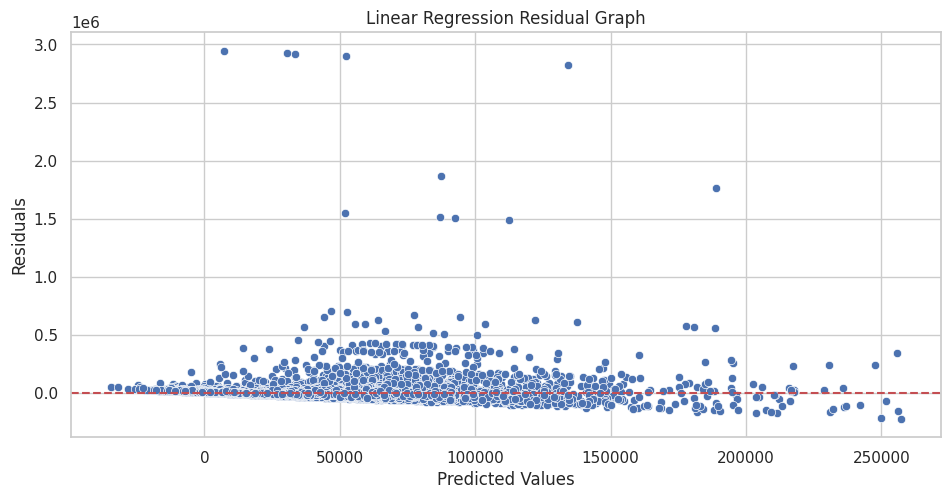

In [ ]:
#Plot a residual graph
Linear_residual = y_val - y_lin_pred
plt.figure(figsize =( 10, 5))
sns.scatterplot(x= y_lin_pred, y= Linear_residual)
plt.axhline(y= 0, color= "r", linestyle= "--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linear Regression Residual Graph")
plt.show()

**Model Evaluation**


In [ ]:
#Evaluate
lin_reg_r2 = r2_score(y_val, y_lin_pred)
lin_reg_rmse = root_mean_squared_error(y_val, y_lin_pred)
#Print
print(f"R2 Score: {lin_reg_r2}")
print(f"RMSE: {lin_reg_rmse}")

R2 Score: 0.14370041847250015
RMSE: 70025.04799911902


###**Lasso**

In [ ]:
#Initialize
lasso = Lasso(alpha = 0.5, max_iter = 2000, fit_intercept=True)
lasso.fit(X_train_processed, y_train)

Lasso(alpha=0.5, max_iter=2000)

In [ ]:
#Make prediction
y_lasso_pred = lasso.predict(X_val_processed)


In [ ]:
#Compare the result
result["Lasso"] = y_lasso_pred
display(result.head().style.format(precision=0))

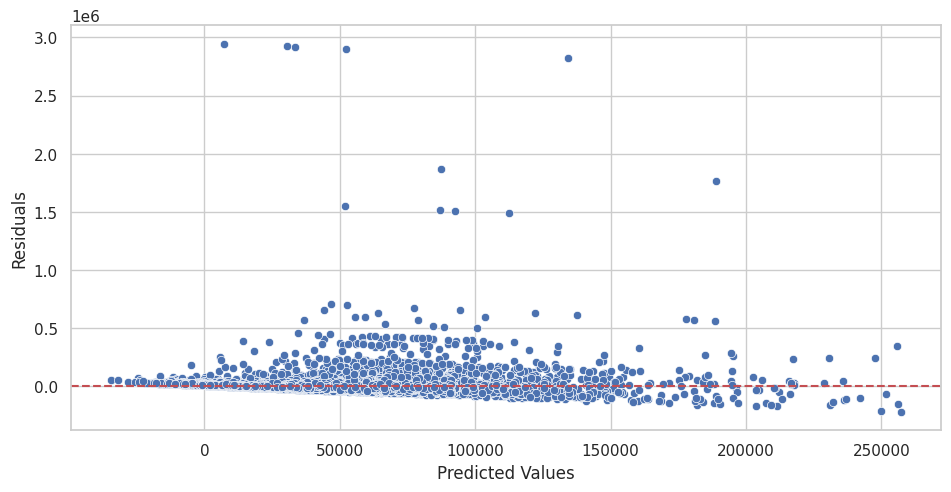

In [ ]:
#Plot residual  plot
lasso_residual = y_val - y_lasso_pred
plt.figure(figsize= (10, 5))
sns.scatterplot(x= y_lasso_pred, y= lasso_residual)
plt.axhline(y= 0, color= "r", linestyle= "--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#Evaluate
lasso_r2 = r2_score(y_val, y_lasso_pred)
lasso_rmse = root_mean_squared_error(y_val, y_lasso_pred)

#print
print(f"R2 Score: {lasso_r2}")
print(f"RMSE: {lasso_rmse}")

R2 Score: 0.14370040086915392
RMSE: 70025.04871888766


###**Decision Tree Regressor**

**Model Training**

In [ ]:
#Initialize the model
dt_reg = DecisionTreeRegressor(random_state= 42, max_depth = 5, min_samples_split= 2, min_samples_leaf = 2, max_features = "sqrt")
dt_reg.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      random_state=42)

In [ ]:
#Make prediction
y_dt_pred = dt_reg.predict(X_val_processed)

In [ ]:
#Compare the result
result["DecisionTree"] = y_dt_pred
display(result.head().style.format(precision=0))

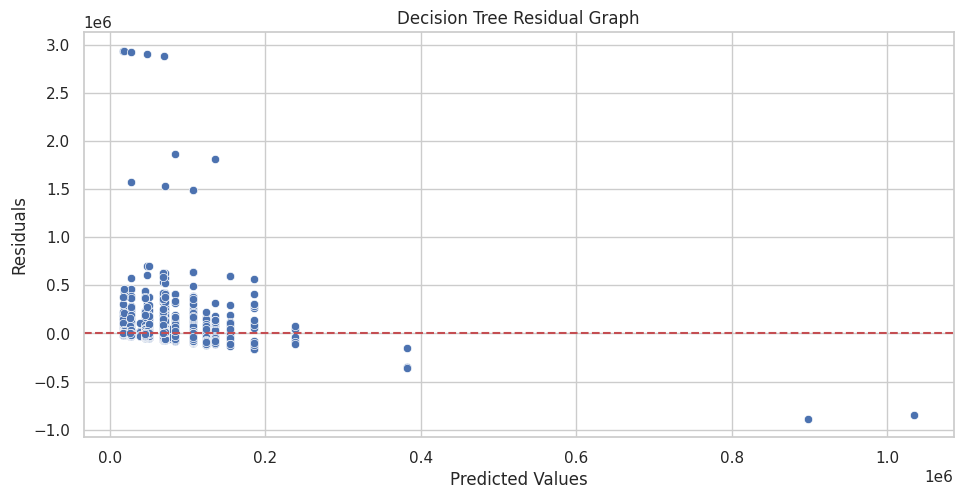

In [ ]:
#Plot the residual graph
dt_residual = y_val - y_dt_pred
plt.figure(figsize= (10, 5))
sns.scatterplot(x= y_dt_pred, y= dt_residual)
plt.axhline(y= 0, color= "r", linestyle= "--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Decision Tree Residual Graph")
plt.show()

**Model Evaluation**

In [ ]:
#Evaluate
dt_reg_r2 = r2_score(y_val, y_dt_pred)
dt_reg_rmse = root_mean_squared_error(y_val, y_dt_pred)

#Print
print(f"R2 Score: {dt_reg_r2}")
print(f"RMSE: {dt_reg_rmse}")

R2 Score: 0.10293759407487069
RMSE: 71672.3884899272


###**Random Forest Regressor**

**Model Training**

In [ ]:
rand = RandomForestRegressor(random_state= 42, n_estimators = 300, max_depth = 5, min_samples_split= 2, max_features ="sqrt", bootstrap = True)
rand.fit(X_train_processed, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [ ]:
#Make predictiom
y_rand_pred = rand.predict(X_val_processed)


In [ ]:
#Compare the result
result["RandomForest"] = y_rand_pred
display(result.head().style.format(precision=0))

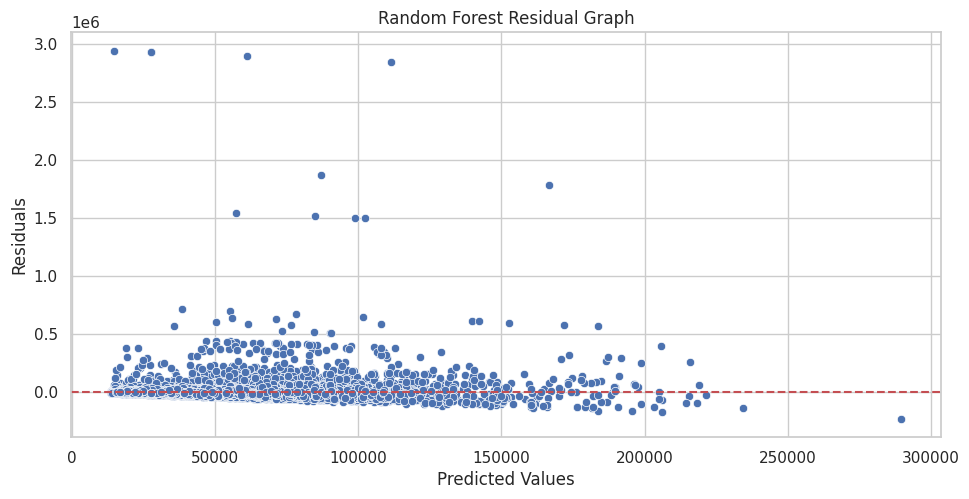

In [ ]:
#Plot the residual
rand_residual = y_val - y_rand_pred
plt.figure(figsize= (10, 5))
sns.scatterplot(x= y_rand_pred, y= rand_residual)
plt.axhline(y= 0, color= "r", linestyle= "--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Random Forest Residual Graph")
plt.show()

**Model Evaluation**

In [ ]:
#Evaluation
rand_r2 = r2_score(y_val, y_rand_pred)
rand_rmse = root_mean_squared_error(y_val, y_rand_pred)

#Print
print(f"R2 Score: {rand_r2}")
print(f"RMSE: {rand_rmse}")

R2 Score: 0.15513967901864734
RMSE: 69555.74493556214


###**Gradient Boosting**

**Model Training**

In [ ]:
#Initialize
gb_reg = GradientBoostingRegressor(random_state= 42, n_estimators= 300, learning_rate= 0.01, max_depth= 5, min_samples_split= 2, max_features = "sqrt", subsample = 0.6)
gb_reg.fit(X_train_processed, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          n_estimators=300, random_state=42, subsample=0.6)

In [ ]:
#Make prediction
y_gb_pred = gb_reg.predict(X_val_processed)


In [ ]:
#Compare the result
result["GradientBoosting"] = y_gb_pred
display(result.head().style.format(precision=0))

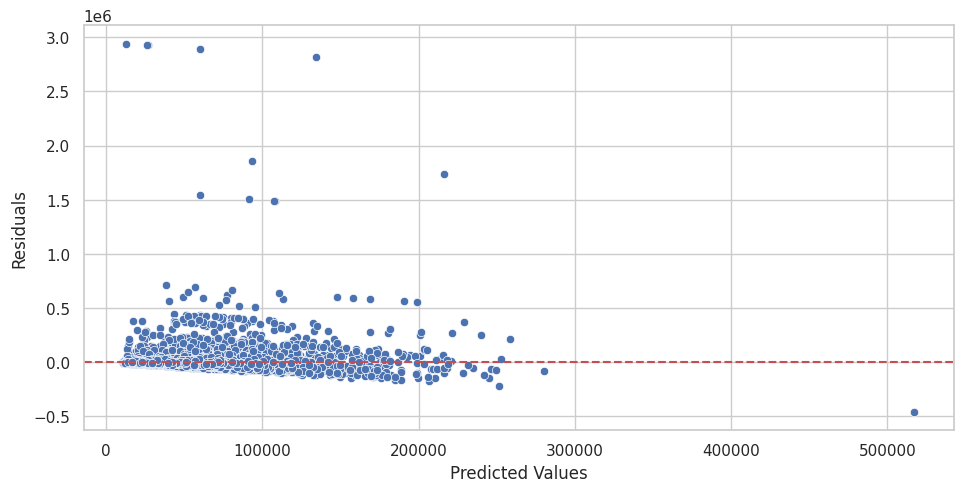

In [ ]:
#Plot the residul
gb_residual = y_val - y_gb_pred
plt.figure(figsize= (10, 5))
sns.scatterplot(x= y_gb_pred, y= gb_residual)
plt.axhline(y= 0, color= "r", linestyle= "--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

**Model Evaluation**

In [ ]:
#Evaluate
gb_r2 = r2_score(y_val, y_gb_pred)
gb_rmse = root_mean_squared_error(y_val, y_gb_pred)

#Print
print(f"R2 Score: {gb_r2}")
print(f"RMSE: {gb_rmse}")

R2 Score: 0.1592630103029683
RMSE: 69385.80431861855


###**XGB Regressor**

**Model Training**

In [ ]:
#Initialize
xgb_reg = XGBRegressor(random_state= 42, n_estimators = 300, max_depth = 5, learning_rate =0.01, subsample = 0.5)
xgb_reg.fit(X_train_processed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#Make prediction
y_xgb_pred = xgb_reg.predict(X_val_processed)

In [ ]:
#Compare the result
result["XGBRegressor"] = y_xgb_pred
display(result.head().style.format(precision=0))

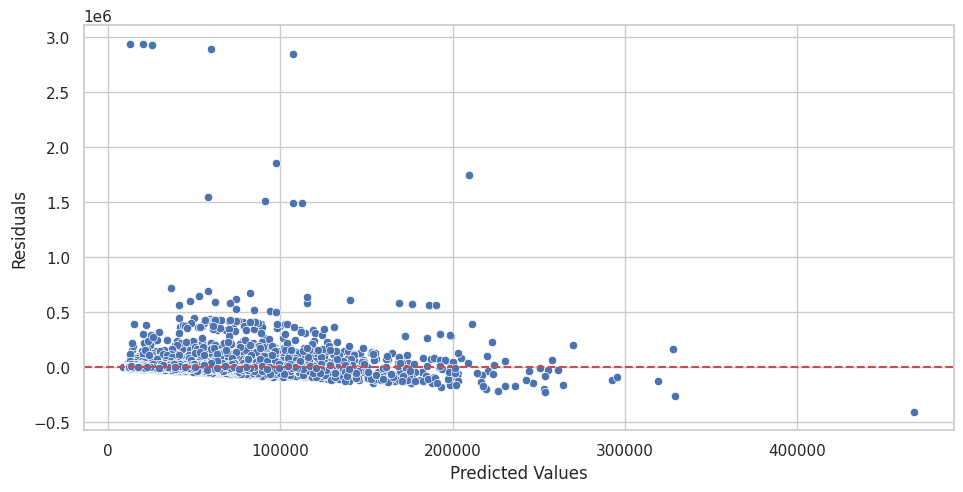

In [ ]:
#Plot residual
xgb_residual = y_val - y_xgb_pred
plt.figure(figsize= (10, 5))
sns.scatterplot(x= y_xgb_pred, y= xgb_residual)
plt.axhline(y= 0, color= "r", linestyle= "--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

**Model Evaluation**

In [ ]:
#Evaluate
xgb_r2 = r2_score(y_val, y_xgb_pred)
xgb_rmse = root_mean_squared_error(y_val, y_xgb_pred)

#Print
print(f"R2 score: {xgb_r2}")
print(f"RMSE: {xgb_rmse}")

R2 score: 0.15406793355941772
RMSE: 69599.84375


###**KNN**

**Model Training**

In [ ]:
#import knn
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
#initialize
knn = KNeighborsRegressor(metric ="minkowski", n_neighbors= 7, leaf_size= 40, p = 2)
knn.fit(X_train_processed, y_train)

KNeighborsRegressor(leaf_size=40, n_neighbors=7)

In [ ]:
#Make prediction
y_knn_pred = knn.predict(X_val_processed)


In [ ]:
#Compare the result
result["KNN"] = y_knn_pred
display(result.head().style.format(precision=0))

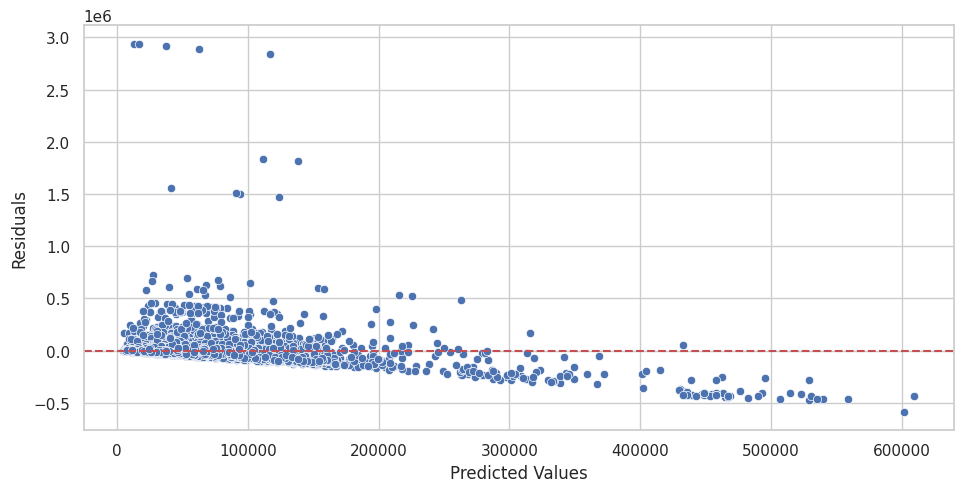

In [ ]:
#Plot the residual
knn_residual = y_val - y_knn_pred
plt.figure(figsize= (10, 5))
sns.scatterplot(x= y_knn_pred, y= knn_residual)
plt.axhline(y= 0, color= "r", linestyle= "--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

**Model Evaluation**

In [ ]:
#Evaluate
knn_r2 = r2_score(y_val, y_knn_pred)
knn_rmse = root_mean_squared_error(y_val, y_knn_pred)

#Print
print(f"R2 score: {knn_r2}")
print(f"RMSE: {knn_rmse}")

R2 score: 0.004421729901559979
RMSE: 75505.4419220981


###**HistoGradient**

In [ ]:
#import histogradient
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
#Initialize
hist = HistGradientBoostingRegressor(random_state= 42, learning_rate = 0.01, max_iter = 300, max_depth = 5, max_leaf_nodes = 2, loss = "squared_error")
hist.fit(X_train_processed, y_train)

HistGradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_iter=300,
                              max_leaf_nodes=2, random_state=42)

In [ ]:
#Make prediction
y_hist_pred = hist.predict(X_val_processed)

In [ ]:
#Compare the result
result["HistGradient"] = y_hist_pred
display(result.head().style.format(precision=0))

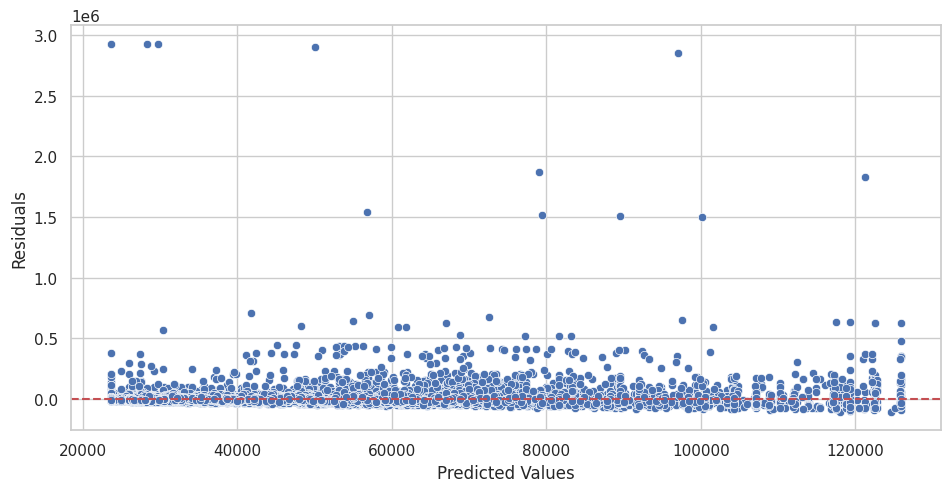

In [ ]:
#PLot the resdual
hist_residual = y_val - y_hist_pred
plt.figure(figsize= (10, 5))
sns.scatterplot(x= y_hist_pred, y= hist_residual)
plt.axhline(y= 0, color= "r", linestyle= "--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

**Model Evaluation**

In [ ]:
#Evaluate
hist_r2 = r2_score(y_val, y_hist_pred)
hist_rmse = root_mean_squared_error(y_val, y_hist_pred)

#Print
print(f"R2 score: {hist_r2}")
print(f"RMSE: {hist_rmse}")

R2 score: 0.13751871261947757
RMSE: 70277.35211432041


**Comparing the overall result by RSME**

In [ ]:
#Comparing the overall performance
overall_baseline_performance = pd.DataFrame(
    {"Models": ["LinearRegressor", "DecisionTree Regressor", "RandomForeset Regressor", "GradientBoosting",
                "XGB Regressor", "KNN Regressor", "HistoGradient"],
    "R2 Score":[lin_reg_r2, dt_reg_r2, rand_r2, gb_r2, xgb_r2, knn_r2, hist_r2],
    "RMSE": [lin_reg_rmse, dt_reg_rmse, rand_rmse, gb_rmse, xgb_rmse, knn_rmse, hist_rmse]

})
display(overall_baseline_performance.sort_values(by= "RMSE", ascending = True))

Models  R2 Score          RMSE
3         GradientBoosting  0.159263  69385.804319
2  RandomForeset Regressor  0.155140  69555.744936
4            XGB Regressor  0.154068  69599.843750
0          LinearRegressor  0.143700  70025.047999
6            HistoGradient  0.137519  70277.352114
1   DecisionTree Regressor  0.102938  71672.388490
5            KNN Regressor  0.004422  75505.441922

###**HYPERPARAMETER TUNING**

In [ ]:
#Define instant for GridSearchCV

def tune_evaluate (name, model, param_grid, X_train_processed, y_train, X_val_processed, y_val, cv =5):
   print(f"\n Turning and Evaluation: {name} with GridSearchCV (cv={cv})")

  #Hyperparameter tuning with R2 as scoring
   grid_search= GridSearchCV(estimator= model,
                            param_grid= param_grid,
                            cv=cv,
                            scoring= None,
                            n_jobs= -1,
                            verbose= 2)

  #Model Training
   grid_search.fit(X_train_processed, y_train)

  #Check for the best Parameter
   Best_model = grid_search.best_estimator_
   print(f"Best Parameter: {grid_search.best_params_}")
   print(f"Best Score: {grid_search.best_score_}")

  #Make prediction
   y_pred= Best_model.predict(X_val_processed)

  #Metrics
   r2= r2_score(y_val, y_pred)
   rmse = root_mean_squared_error(y_val, y_pred)


  #Print the metrics
   print(f"R2: {r2}")
   print(f"RMSE: {rmse}")

  #Residual plot
   residual = y_val- y_pred
   plt.figure(figsize=(10, 4))
   plt.scatter(y_pred, residual)
   plt.axhline(y=0, color= "orange", linestyle= "--")
   plt.xlabel("Predicted Values")
   plt.ylabel("Residuals")
   plt.title(f"Residual Plot For {name}", fontsize= 10, fontweight= "bold")
   plt.show()


   return {"model": Best_model,
           "name": name,
           "r2": r2,
           "RMSE":rmse,
           "best_params": grid_search.best_params_,
           "best_R2": grid_search.best_score_

           }




###**Gradient Boosting Tuned**


 Turning and Evaluation: GradientBoosting with GridSearchCV (cv=5)
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameter: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 400}
Best Score: 0.15336289833062622
R2: 0.15879559004729027
RMSE: 69405.08967434558


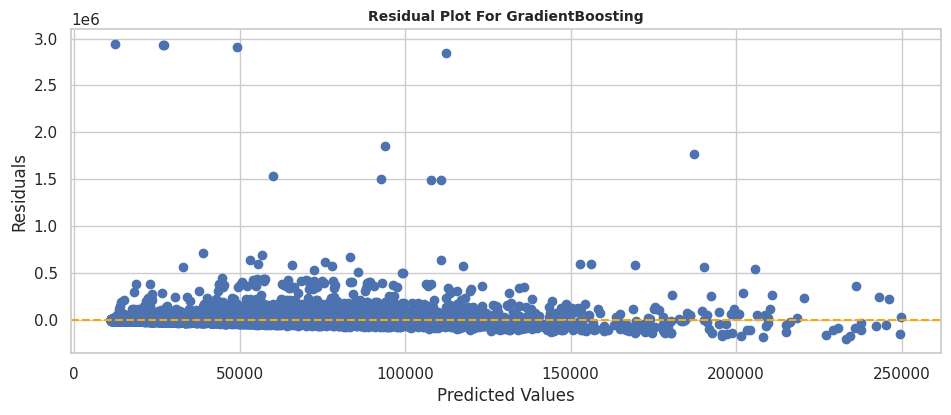

In [227]:
#Initialize
gb_tuned = GradientBoostingRegressor(random_state= 42)

gb_param_grid ={
    "n_estimators": [200, 300, 400],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
    "min_samples_split":[2, 5],
    "max_features": ["sqrt", "log2"]

}

gb_result = tune_evaluate("GradientBoosting", gb_tuned, gb_param_grid, X_train_processed, y_train, X_val_processed, y_val)


In [240]:
#comparing the result
result["GradientBoostingRegressorTuned"] = gb_result["model"].predict(X_val_processed)
display(result.head().style.format(precision=0))

In [241]:
#Check based on the r2, model and rsme
overall_baseline_performance["GradientBoostingRegressorTuned"] = gb_result["r2"]
overall_baseline_performance["GradientBoostingRegressorTuned_RMSE"] = gb_result["RMSE"]
display(overall_baseline_performance.sort_values(by= "RMSE", ascending = True))


Models  R2 Score          RMSE  \
3         GradientBoosting  0.159263  69385.804319   
2  RandomForeset Regressor  0.155140  69555.744936   
4            XGB Regressor  0.154068  69599.843750   
0          LinearRegressor  0.143700  70025.047999   
6            HistoGradient  0.137519  70277.352114   
1   DecisionTree Regressor  0.102938  71672.388490   
5            KNN Regressor  0.004422  75505.441922   

   GradientBoostingRegressorTuned  GradientBoostingRegressorTuned_RMSE  
3                        0.158796                         69405.089674  
2                        0.158796                         69405.089674  
4                        0.158796                         69405.089674  
0                        0.158796                         69405.089674  
6                        0.158796                         69405.089674  
1                        0.158796                         69405.089674  
5                        0.158796                         69405.089674

###**Save model**

In [229]:
#save the initial gradient boosting of rsme of 69385
joblib.dump(gb_reg , "gb_reg.pkl")


['gb_reg.pkl']

In [230]:
#load
best_modell =joblib.load("gb_reg.pkl")

In [233]:
final_pred = best_modell.predict(test_df_final)



In [234]:
#create a dataframe
submission_best = pd.DataFrame({"id": test_id, " Price": final_pred})

In [235]:
display(submission_best.head())

id         Price
0  188533  18735.531021
1  188534  83978.369732
2  188535  56629.251891
3  188536  32387.873531
4  188537  31974.334498

In [236]:
#save as csv
submission_best.to_csv("submission_best.csv", index= False)

Features  Importance
0                num__milage    0.190403
14        cat_target__engine    0.174153
12         cat_target__model    0.132166
1               num__car_age    0.095964
2        num__total_distance    0.095634
16       cat_target__ext_col    0.056436
15  cat_target__transmission    0.040691
17       cat_target__int_col    0.038989
11         cat_target__brand    0.038654
5           cat_count__model    0.029235
7          cat_count__engine    0.024850
9         cat_count__ext_col    0.023299
10        cat_count__int_col    0.018776
8    cat_count__transmission    0.014776
4           cat_count__brand    0.012803
13     cat_target__fuel_type    0.006086
6       cat_count__fuel_type    0.004384
3      passthrough__accident    0.002701

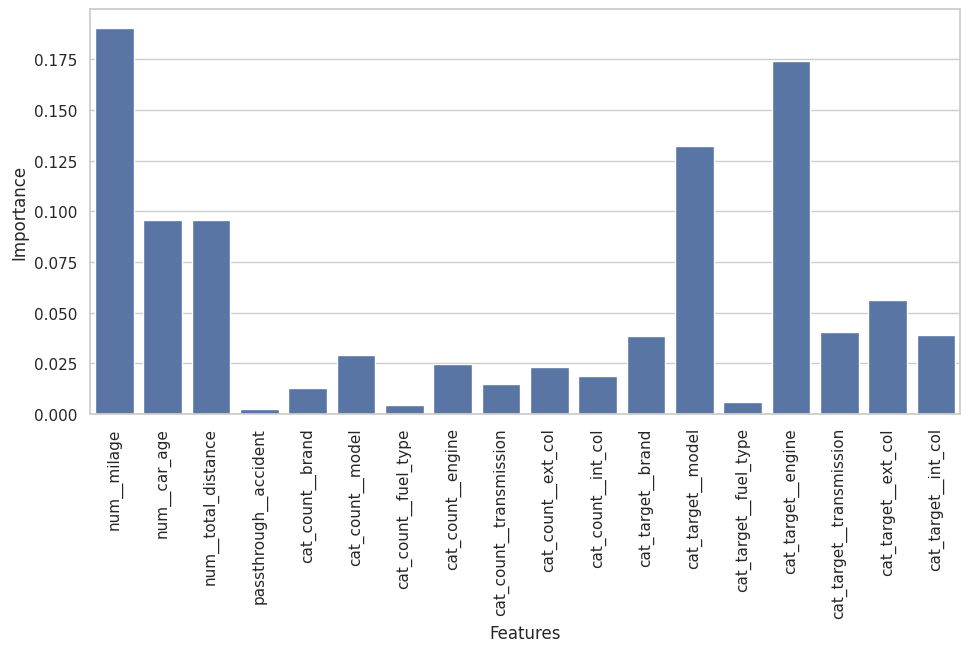

In [242]:
#Check feature importance
features_importance = best_modell.feature_importances_
features_importance_df = pd.DataFrame({"Features": X_train_processed.columns, "Importance": features_importance})
display(features_importance_df.sort_values(by= "Importance", ascending = False))

#plot a graph
plt.figure(figsize= (10, 5))
sns.barplot(x= "Features", y= "Importance", data= features_importance_df)
plt.xticks(rotation= 90)
plt.show()